# Step 1 Import the data

4.10: Coding Etiquette & Excel Reporting

In [1]:
#import thelibraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# loading the new prepared data frames

In [3]:
path = r'c:\Users\graha\Desktop\Career foundry\Chapter 4\Instacart Basket Analysis 09.02.2024'

In [4]:
df_final = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_final.pkl'))

In [5]:
#Specifying exactly where the new data frame is and defining its name
df_dep = pd.read_csv(os.path.join(path, '02 Data', 'Original Data', 'departments.csv'), index_col = False)

In [6]:
df_dep.head()

department_id       1      2       3        4        5              6  \
0    department  frozen  other  bakery  produce  alcohol  international   

           7     8                9  ...            12      13         14  \
0  beverages  pets  dry goods pasta  ...  meat seafood  pantry  breakfast   

             15          16         17      18      19    20       21  
0  canned goods  dairy eggs  household  babies  snacks  deli  missing  

[1 rows x 22 columns]

In [7]:
print(df_dep['department_id'].dtype)

object


In [8]:
print(df_final['department_id'].dtype)

int64


In [9]:
df_final['department_id'] = df_final['department_id'].astype(str)

In [10]:
#transposing the data from long format into short format - NB! dont forget python is case sensitive
df_dep.T

0
department_id       department
1                       frozen
2                        other
3                       bakery
4                      produce
5                      alcohol
6                international
7                    beverages
8                         pets
9              dry goods pasta
10                        bulk
11               personal care
12                meat seafood
13                      pantry
14                   breakfast
15                canned goods
16                  dairy eggs
17                   household
18                      babies
19                      snacks
20                        deli
21                     missing

In [11]:
df_dep_t = df_dep.T

In [12]:
df_dep_t.head(21)

0
department_id       department
1                       frozen
2                        other
3                       bakery
4                      produce
5                      alcohol
6                international
7                    beverages
8                         pets
9              dry goods pasta
10                        bulk
11               personal care
12                meat seafood
13                      pantry
14                   breakfast
15                canned goods
16                  dairy eggs
17                   household
18                      babies
19                      snacks
20                        deli

In [13]:
#Resetting the index
df_dep_t.reset_index()

index                0
0   department_id       department
1               1           frozen
2               2            other
3               3           bakery
4               4          produce
5               5          alcohol
6               6    international
7               7        beverages
8               8             pets
9               9  dry goods pasta
10             10             bulk
11             11    personal care
12             12     meat seafood
13             13           pantry
14             14        breakfast
15             15     canned goods
16             16       dairy eggs
17             17        household
18             18           babies
19             19           snacks
20             20             deli
21             21          missing

In [14]:
#step 1 Create a new header - NB! Indexing in python starts at 0 not 1
new_header = df_dep_t.iloc[0]

In [15]:
#step 1 Create a new header - NB! Indexing in python starts at 0 not 1
new_header = df_dep_t.iloc[0]

In [16]:
new_header

0    department
Name: department_id, dtype: object

In [17]:
#since we have created a new row (new header by adding a row essentially) 
#we must now delete this first new row which was the header.
df_dep_t_new = df_dep_t[1:]

In [18]:
#lets check to see what it looks like
df_dep_t_new
#no more column names in our data rows

0
1            frozen
2             other
3            bakery
4           produce
5           alcohol
6     international
7         beverages
8              pets
9   dry goods pasta
10             bulk
11    personal care
12     meat seafood
13           pantry
14        breakfast
15     canned goods
16       dairy eggs
17        household
18           babies
19           snacks
20             deli
21          missing

In [19]:
#now we need to add an new column header
df_dep_t_new.columns = new_header

In [20]:
# lets check to see if it was successful - it looks good and the new names are in the right place
df_dep_t_new

department_id       department
1                       frozen
2                        other
3                       bakery
4                      produce
5                      alcohol
6                international
7                    beverages
8                         pets
9              dry goods pasta
10                        bulk
11               personal care
12                meat seafood
13                      pantry
14                   breakfast
15                canned goods
16                  dairy eggs
17                   household
18                      babies
19                      snacks
20                        deli
21                     missing

In [21]:
#creating the data dictionary from the df_dep_t_new dataframe
data_dict = df_dep_t_new.to_dict('index')

In [22]:
#Checking to see what the new data looks like
data_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [23]:
# Merge df_dep into df
df_dep = df_final.merge(df_dep, on='department_id', indicator='merge_indicator')

In [24]:
# Now map the department IDs to department names
df_final['department'] = df_final['department_id'].map(data_dict)

In [25]:
# Set the blue color palette
blue_palette = ['#3f83d1', '#1a5aad', '#004080', '#6eb5ff']

In [26]:
df_final.head(100)

order_id  user_id  order_number  order_day  order_hour_of_day  \
0    2539329        1             1          2                  8   
1    2398795        1             2          3                  7   
2     473747        1             3          3                 12   
3    2254736        1             4          4                  7   
4     431534        1             5          4                 15   
..       ...      ...           ...        ...                ...   
95   3317979       15             5          4                 15   
96   2685110       15             7          1                 11   
97    887727       15             9          2                 13   
98   2600170       15            11          2                  9   
99   2332087       15            13          1                 10   

    days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                      NaN         196                  1          0   
1                     15.0         196                  1          1   
2                     21.0         196                  1          1   
3                     29.0         196                  1          1   
4                     28.0         196                  1          1   
..                     ...         ...                ...        ...   
95                    17.0       14715                  1          1   
96                    17.0       14715                  3          1   
97                     7.0       14715                  1          1   
98                    14.0       14715                  1          1   
99                    14.0       14715                  3          1   

     product_name  ...  surname  Gender    State Age date_joined dependants  \
0            Soda  ...   Nguyen  Female  Alabama  31  2019-02-17          3   
1            Soda  ...   Nguyen  Female  Alabama  31  2019-02-17          3   
2            Soda  ...   Nguyen  Female  Alabama  31  2019-02-17          3   
3            Soda  ...   Nguyen  Female  Alabama  31  2019-02-17          3   
4            Soda  ...   Nguyen  Female  Alabama  31  2019-02-17          3   
..            ...  ...      ...     ...      ...  ..         ...        ...   
95  Coconut Water  ...  Woodard  Female  Indiana  69  2019-06-03          0   
96  Coconut Water  ...  Woodard  Female  Indiana  69  2019-06-03          0   
97  Coconut Water  ...  Woodard  Female  Indiana  69  2019-06-03          0   
98  Coconut Water  ...  Woodard  Female  Indiana  69  2019-06-03          0   
99  Coconut Water  ...  Woodard  Female  Indiana  69  2019-06-03          0   

       family_status income _merge                   department  
0            married  40423   both  {'department': 'beverages'}  
1            married  40423   both  {'department': 'beverages'}  
2            married  40423   both  {'department': 'beverages'}  
3            married  40423   both  {'department': 'beverages'}  
4            married  40423   both  {'department': 'beverages'}  
..               ...    ...    ...                          ...  
95  divorced/widowed  54313   both  {'department': 'beverages'}  
96  divorced/widowed  54313   both  {'department': 'beverages'}  
97  divorced/widowed  54313   both  {'department': 'beverages'}  
98  divorced/widowed  54313   both  {'department': 'beverages'}  
99  divorced/widowed  54313   both  {'department': 'beverages'}  

[100 rows x 37 columns]

In [27]:
# dropping the "_merge" column
df_final.drop(columns=['_merge'], inplace=True)

In [28]:
df_final.head()

order_id  user_id  order_number  order_day  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...  first_name surname  Gender    State Age date_joined  \
0         Soda  ...       Linda  Nguyen  Female  Alabama  31  2019-02-17   
1         Soda  ...       Linda  Nguyen  Female  Alabama  31  2019-02-17   
2         Soda  ...       Linda  Nguyen  Female  Alabama  31  2019-02-17   
3         Soda  ...       Linda  Nguyen  Female  Alabama  31  2019-02-17   
4         Soda  ...       Linda  Nguyen  Female  Alabama  31  2019-02-17   

  dependants family_status income                   department  
0          3       married  40423  {'department': 'beverages'}  
1          3       married  40423  {'department': 'beverages'}  
2          3       married  40423  {'department': 'beverages'}  
3          3       married  40423  {'department': 'beverages'}  
4          3       married  40423  {'department': 'beverages'}  

[5 rows x 36 columns]

In [29]:
df_final.shape

(32404859, 36)

In [30]:
#Creating sample dataframe to test true false
np.random.seed(4)
df_final = df_final[:1000000]

# Step 2 Considering Security Implications

 # Step 3 Creating Regional Segments

In [31]:
#Creating a region column based on wikipedia information
# Create a new column 'region' and use loc for mapping
df_final['region'] = 'West'

df_final.loc[
    df_final['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']),
    'region'
] = 'Northeast'

df_final.loc[
    df_final['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']),
    'region'
] = 'Midwest'

df_final.loc[
    df_final['State'].isin(['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']),
    'region'
] = 'South'

In [32]:
#checking the results
df_final.head()

order_id  user_id  order_number  order_day  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...  surname  Gender    State Age date_joined dependants  \
0         Soda  ...   Nguyen  Female  Alabama  31  2019-02-17          3   
1         Soda  ...   Nguyen  Female  Alabama  31  2019-02-17          3   
2         Soda  ...   Nguyen  Female  Alabama  31  2019-02-17          3   
3         Soda  ...   Nguyen  Female  Alabama  31  2019-02-17          3   
4         Soda  ...   Nguyen  Female  Alabama  31  2019-02-17          3   

  family_status income                   department region  
0       married  40423  {'department': 'beverages'}  South  
1       married  40423  {'department': 'beverages'}  South  
2       married  40423  {'department': 'beverages'}  South  
3       married  40423  {'department': 'beverages'}  South  
4       married  40423  {'department': 'beverages'}  South  

[5 rows x 37 columns]

In [33]:
df_final['user_id'].shape

(1000000,)

In [34]:
df_final['region'].shape

(1000000,)

In [35]:
df_final.dtypes

order_id                               int64
user_id                                int64
order_number                           int64
order_day                              int64
order_hour_of_day                      int64
days_since_prior_order               float64
product_id                             int64
add_to_cart_order                      int64
reordered                              int64
product_name                          object
aisle_id                               int64
department_id                         object
prices                               float64
price_range_loc                       object
busiest_day                           object
order_day_rank                        object
Busiest_day                           object
busiest_days                          object
Busiest_days                          object
busiest_period_of_day                 object
max_order                              int64
loyalty_flag                          object
mean_produ

the reults match in value 

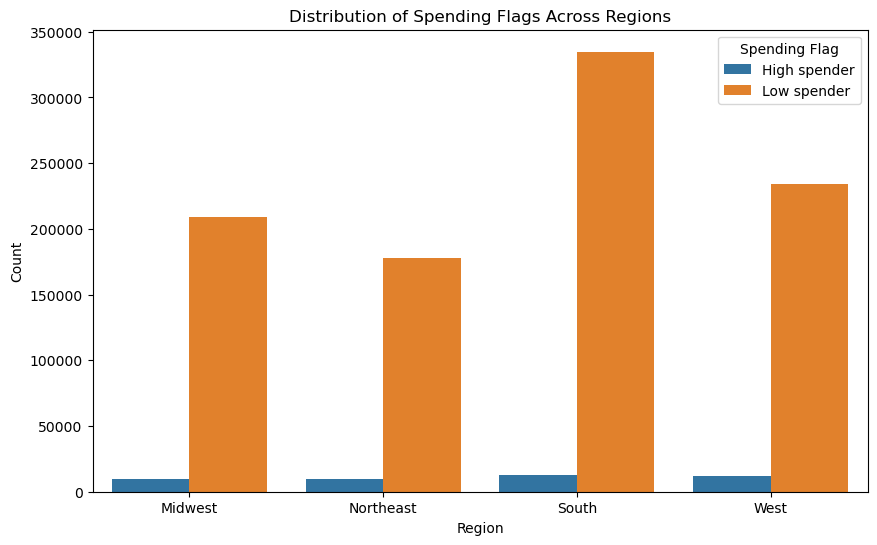

In [36]:
# Grouping by region and spending_flag and counting occurrences
spending_region_counts = df_final.groupby(['region', 'spending_flag']).size().reset_index(name='count')

# Plotting the bar graph
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='count', hue='spending_flag', data=spending_region_counts)
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Distribution of Spending Flags Across Regions')
plt.legend(title='Spending Flag')
#saving the image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 1.png'))
plt.show()

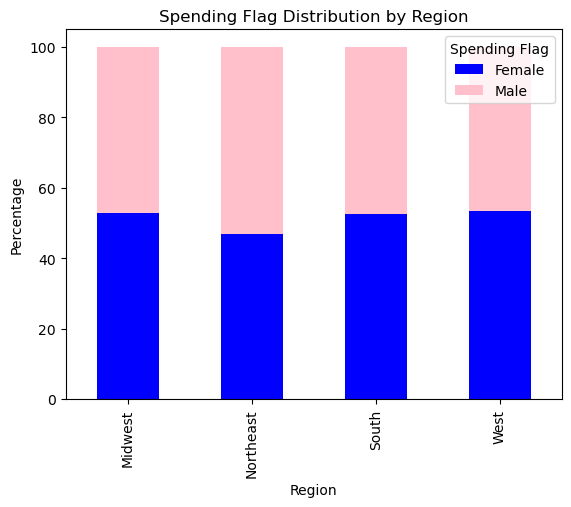

In [37]:
import matplotlib.pyplot as plt

# Making groups and normalizing the result
spending_by_region = df_final.groupby('region')['Gender'].value_counts(normalize=True).unstack() * 100

# Defining colors
colors = ['blue', 'pink']

# Plotting the bar chart
ax = spending_by_region.plot(kind='bar', stacked=True, color=colors)

# Adding labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Percentage')
ax.set_title('Spending Flag Distribution by Region')

# Display the legend without percentage values
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Spending Flag', loc='upper right')

#saving the image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar 1.1.png'))

# Show the plot
plt.show()

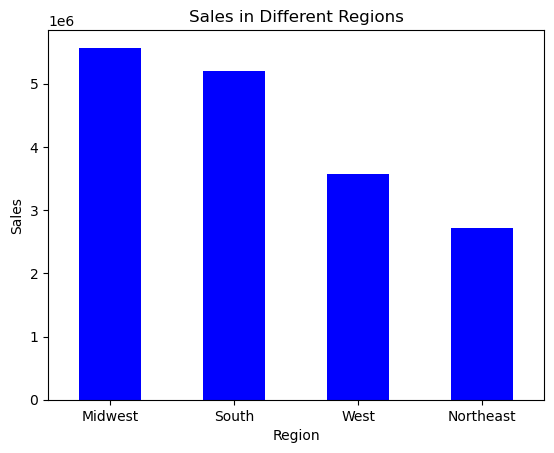

In [38]:
#purchased product prices in different regions
bar_price_region = df_final.groupby('region')['prices'].sum().sort_values(ascending=False).plot.bar(
    title='Sales in Different Regions', xlabel='Region', ylabel='Sales', color='blue'
)

#saving the image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar 1.2.png'))

plt.xticks(rotation=0)
plt.show()

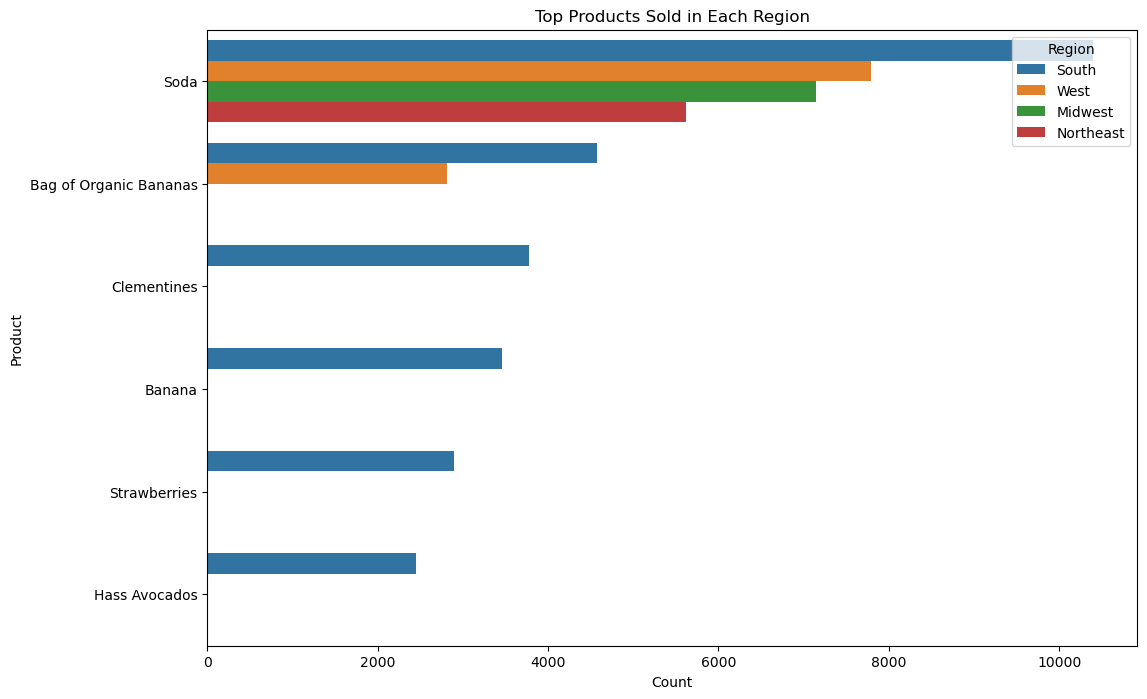

In [39]:
# Grouping by region and product_name and counting occurrences
product_region_counts = df_final.groupby(['region', 'product_name']).size().reset_index(name='count')

# Sorting the data by count to make the visualization clearer
product_region_counts = product_region_counts.sort_values(by='count', ascending=False)

# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='count', y='product_name', hue='region', data=product_region_counts.head(10)) # Change head(10) to visualize more products
plt.xlabel('Count')
plt.ylabel('Product')
plt.title('Top Products Sold in Each Region')
plt.legend(title='Region')
#saving the image
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar 1.3.png'))
plt.show()

# Step 4 Excluding Low Value Customers

In [40]:
# making an "exclude_flag"
df_final['exclude_flag'] = df_final['max_order'] < 5

# Exclude low-activity customers from the data
df_ex = df_final[~df_final['exclude_flag']]

In [41]:
sample_less_5 = df_final[df_final['exclude_flag']]

In [42]:
df_ex.head()

order_id  user_id  order_number  order_day  order_hour_of_day  \
0   2539329        1             1          2                  8   
1   2398795        1             2          3                  7   
2    473747        1             3          3                 12   
3   2254736        1             4          4                  7   
4    431534        1             5          4                 15   

   days_since_prior_order  product_id  add_to_cart_order  reordered  \
0                     NaN         196                  1          0   
1                    15.0         196                  1          1   
2                    21.0         196                  1          1   
3                    29.0         196                  1          1   
4                    28.0         196                  1          1   

  product_name  ...  Gender    State  Age date_joined dependants  \
0         Soda  ...  Female  Alabama   31  2019-02-17          3   
1         Soda  ...  Female  Alabama   31  2019-02-17          3   
2         Soda  ...  Female  Alabama   31  2019-02-17          3   
3         Soda  ...  Female  Alabama   31  2019-02-17          3   
4         Soda  ...  Female  Alabama   31  2019-02-17          3   

  family_status income                   department region exclude_flag  
0       married  40423  {'department': 'beverages'}  South        False  
1       married  40423  {'department': 'beverages'}  South        False  
2       married  40423  {'department': 'beverages'}  South        False  
3       married  40423  {'department': 'beverages'}  South        False  
4       married  40423  {'department': 'beverages'}  South        False  

[5 rows x 38 columns]

In [43]:
#Checking the shape
sample_less_5.shape

(19976, 38)

In [44]:
#saving data frame
sample_less_5.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10less_than_5_order_customers.pkl'))

# Step 5 Creating a data frame for marketing

In [45]:
#Making it easier to view the column names
df_final.dtypes

order_id                               int64
user_id                                int64
order_number                           int64
order_day                              int64
order_hour_of_day                      int64
days_since_prior_order               float64
product_id                             int64
add_to_cart_order                      int64
reordered                              int64
product_name                          object
aisle_id                               int64
department_id                         object
prices                               float64
price_range_loc                       object
busiest_day                           object
order_day_rank                        object
Busiest_day                           object
busiest_days                          object
Busiest_days                          object
busiest_period_of_day                 object
max_order                              int64
loyalty_flag                          object
mean_produ

In [46]:
#creating a dataframe
marketing_columns = ['user_id', 'order_number', 'order_hour_of_day', 'days_since_prior_order', 
                     'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'department_id', 
                     'prices', 'price_range_loc', 'order_day_rank', 'department_id',
                     'max_order', 'loyalty_flag', 'mean_product_price', 'order_number', 
                     'spending_flag', 'order_frequency', 'order_day', 'department',
                     'Gender', 'State', 'Age', 'dependants', 'family_status', 'income', 'region']

In [47]:
marketing = df_ex[marketing_columns]

In [48]:
marketing.shape

(980024, 28)

In [49]:
marketing.shape

(980024, 28)

In [50]:
marketing.dtypes

user_id                     int64
order_number                int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
department_id              object
prices                    float64
price_range_loc            object
order_day_rank             object
department_id              object
max_order                   int64
loyalty_flag               object
mean_product_price        float64
order_number                int64
spending_flag              object
order_frequency            object
order_day                   int64
department                 object
Gender                     object
State                      object
Age                         int64
dependants                  int64
family_status              object
income                      int64
region                     object
dtype: object

In [51]:
marketing.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10 marketing.pkl'))

# Step 6 Creat visualisations

In [52]:
### there are a few category of interest which i will look at when identifying distribution profiles.
### income, age, days since prior order, loyalty, mean product price, family breakdown

In [53]:
#restricing data to two decimal points in the visualisations
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [54]:
marketing.describe()

user_id  order_number  order_hour_of_day  days_since_prior_order  \
count 980024.00     980024.00          980024.00               936187.00   
mean   88175.89         20.30              12.89                    9.99   
std    51024.90         19.11               4.03                    8.22   
min        1.00          1.00               0.00                    0.00   
25%    43924.00          6.00              10.00                    4.00   
50%    88243.00         14.00              13.00                    7.00   
75%   132833.00         29.00              16.00                   13.00   
max   176637.00         99.00              23.00                   30.00   

       product_id  add_to_cart_order  reordered    prices  max_order  \
count   980024.00          980024.00  980024.00 980024.00  980024.00   
mean     24317.01               7.24       0.63     16.52      39.25   
std      14615.00               7.10       0.48    754.39      26.39   
min          1.00               1.00       0.00      1.00       5.00   
25%      12253.00               2.00       0.00      3.90      18.00   
50%      23888.00               5.00       1.00      7.00      33.00   
75%      37687.00              10.00       1.00     10.70      54.00   
max      49688.00              88.00       1.00  99999.00      99.00   

       mean_product_price  order_number  order_day       Age  dependants  \
count           980024.00     980024.00  980024.00 980024.00   980024.00   
mean                16.52         20.30       2.87     49.65        1.50   
std                151.56         19.11       1.90     18.80        1.12   
min                  2.50          1.00       0.00     18.00        0.00   
25%                  6.95          6.00       1.00     33.00        1.00   
50%                  7.58         14.00       3.00     50.00        2.00   
75%                  8.14         29.00       5.00     66.00        2.00   
max               8794.88         99.00       6.00     81.00        3.00   

         income  
count 980024.00  
mean   92165.14  
std    51350.89  
min    25979.00  
25%    51917.00  
50%    86009.00  
75%   123658.00  
max   559700.00

### looking at income

In [55]:
marketing['income'].describe()

count   980024.00
mean     92165.14
std      51350.89
min      25979.00
25%      51917.00
50%      86009.00
75%     123658.00
max     559700.00
Name: income, dtype: float64

In [56]:
# Set the income thresholds for low and high income
low_income_threshold = 50000
high_income_threshold = 100000

In [57]:
# Create a new column 'income_category' based on the 'income' column
marketing['income_category'] = pd.cut(
    marketing['income'],
    bins=[-float('inf'), low_income_threshold, high_income_threshold, float('inf')],
    labels=['Low Income', 'Middle Income', 'High Income'],
    include_lowest=True)

C:\Users\graha\AppData\Local\Temp\ipykernel_3020\1312441844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing['income_category'] = pd.cut(


In [58]:
marketing.head()

user_id  order_number  order_hour_of_day  days_since_prior_order  \
0        1             1                  8                     NaN   
1        1             2                  7                   15.00   
2        1             3                 12                   21.00   
3        1             4                  7                   29.00   
4        1             5                 15                   28.00   

   product_id  add_to_cart_order  reordered product_name department_id  \
0         196                  1          0         Soda             7   
1         196                  1          1         Soda             7   
2         196                  1          1         Soda             7   
3         196                  1          1         Soda             7   
4         196                  1          1         Soda             7   

   prices  ... order_day                   department  Gender    State Age  \
0    9.00  ...         2  {'department': 'beverages'}  Female  Alabama  31   
1    9.00  ...         3  {'department': 'beverages'}  Female  Alabama  31   
2    9.00  ...         3  {'department': 'beverages'}  Female  Alabama  31   
3    9.00  ...         4  {'department': 'beverages'}  Female  Alabama  31   
4    9.00  ...         4  {'department': 'beverages'}  Female  Alabama  31   

   dependants  family_status income region  income_category  
0           3        married  40423  South       Low Income  
1           3        married  40423  South       Low Income  
2           3        married  40423  South       Low Income  
3           3        married  40423  South       Low Income  
4           3        married  40423  South       Low Income  

[5 rows x 29 columns]

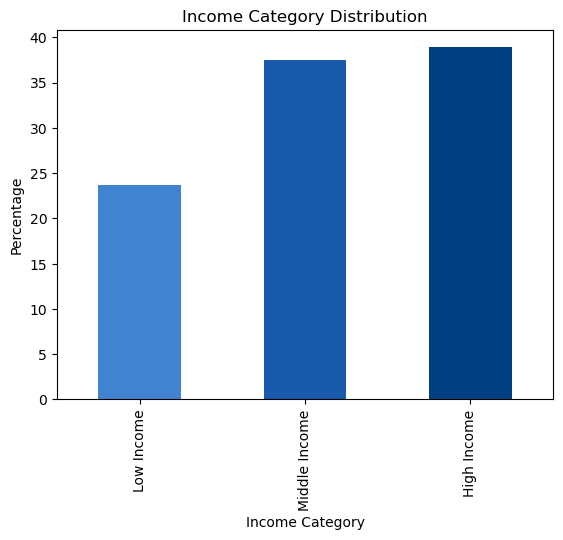

In [59]:
# Plot the percentage distribution of income categories
percentage_distribution = (marketing['income_category'].value_counts(normalize=True) * 100).sort_index()
percentage_distribution.plot.bar(color=['#3f83d1', '#1a5aad', '#004080'])
plt.xlabel('Income Category')
plt.ylabel('Percentage')
plt.title('Income Category Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 2.png'))

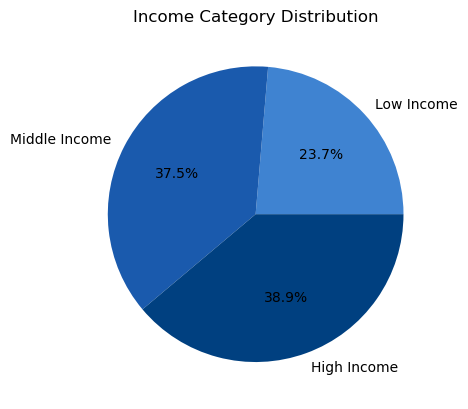

In [60]:
income_pie=plt.pie(percentage_distribution, labels=percentage_distribution.index, autopct='%1.1f%%', colors = ['#3f83d1', '#1a5aad', '#004080'])
plt.title('Income Category Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_income.png'))
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 3.png'))

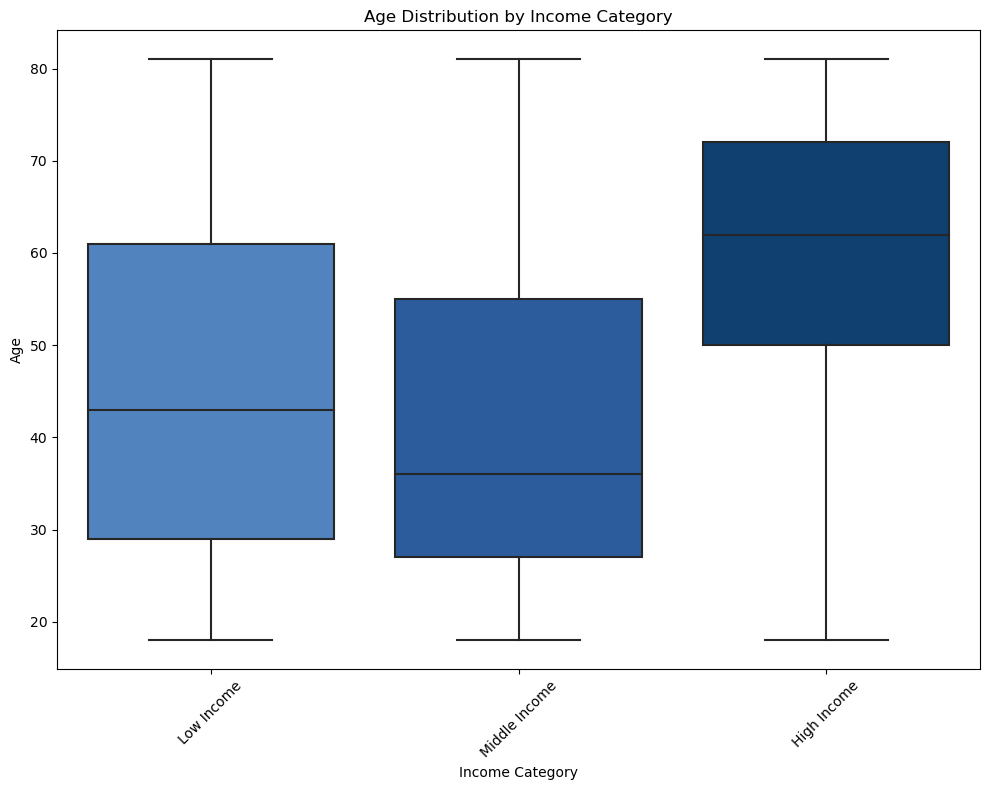

In [122]:
plt.figure(figsize=(10, 8))  # Increase the figure size
sns.boxplot(x='income_category', y='Age', data=marketing, palette=['#3f83d1', '#1a5aad', '#004080'])
plt.title('Age Distribution by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 4.png'))
plt.show()

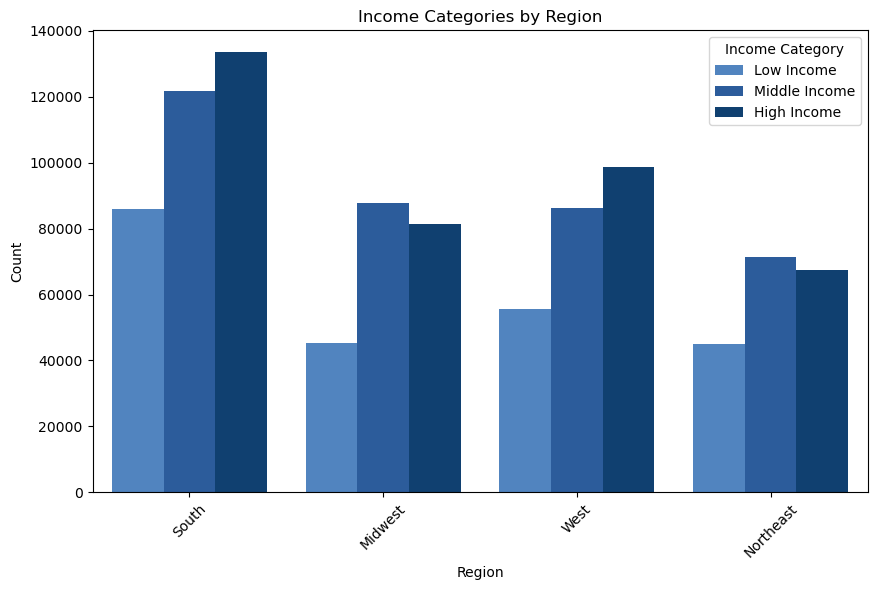

In [62]:
# Grouped bar chart of income categories by region
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='income_category', data=marketing, palette=['#3f83d1', '#1a5aad', '#004080'])
plt.title('Income Categories by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income Category')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 5.png'))
plt.show()

### looking at age

In [63]:
marketing['Age'].describe()

count   980024.00
mean        49.65
std         18.80
min         18.00
25%         33.00
50%         50.00
75%         66.00
max         81.00
Name: Age, dtype: float64

In [64]:
#making age-group column
def age_label(row):
    if row['Age'] <= 24:
        return 'young-adult'
    elif 24 < row['Age'] <= 44:
        return 'adult'
    elif 44 < row['Age'] < 60:
        return 'middle-age'
    else:
        return 'senior'

In [65]:
# Set the blue color palette
blue_palette = ['#3f83d1', '#1a5aad', '#004080', '#6eb5ff']

In [66]:
marketing['age_group'] = marketing.apply(age_label, axis=1)

C:\Users\graha\AppData\Local\Temp\ipykernel_3020\3577859377.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing['age_group'] = marketing.apply(age_label, axis=1)


In [67]:
marketing['age_group'].value_counts()

age_group
senior         347120
adult          304777
middle-age     217342
young-adult    110785
Name: count, dtype: int64

In [68]:
# Calculate the percentage distribution of age groups
percentage_distribution_age = (marketing['age_group'].value_counts(normalize=True) * 100).sort_index()

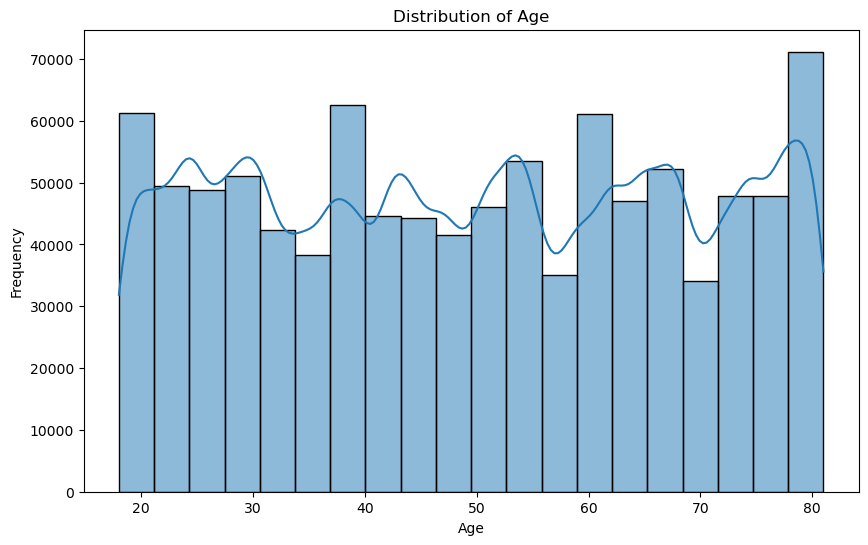

In [69]:
#Histogram of age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=marketing, x='Age', bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 6.png'))

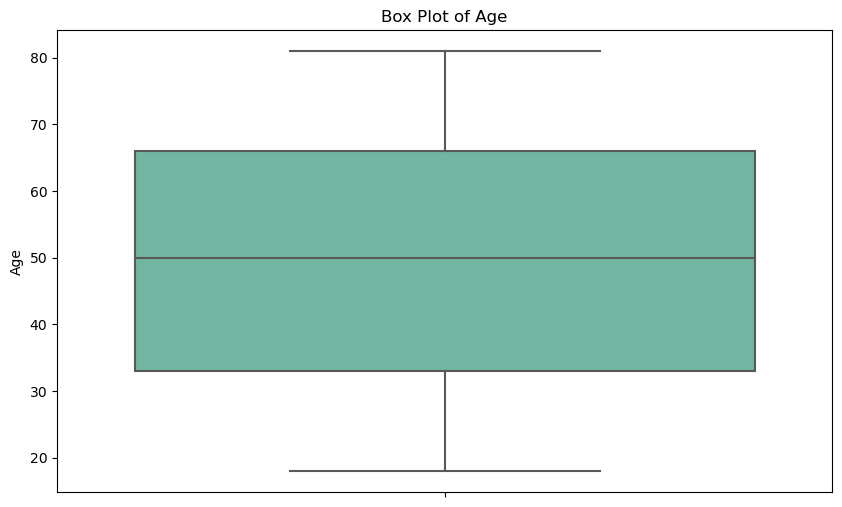

In [70]:
#Box Plot of age distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data=marketing, y='Age', palette='Set2')
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 7.png'))
plt.show()

In [71]:
# Set the blue color palette
blue_palette = ['#3f83d1', '#1a5aad', '#004080']

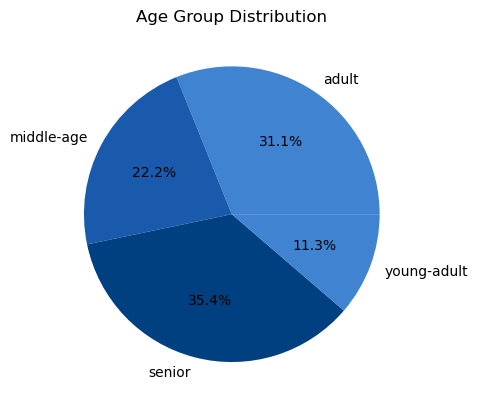

In [72]:
# Plot the pie chart with specified colors
pie_age_groups=plt.pie(percentage_distribution_age, labels=percentage_distribution_age.index, autopct='%1.1f%%', colors=blue_palette)
plt.title('Age Group Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_group.png'))
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 8.png'))

### Customer Loyalty

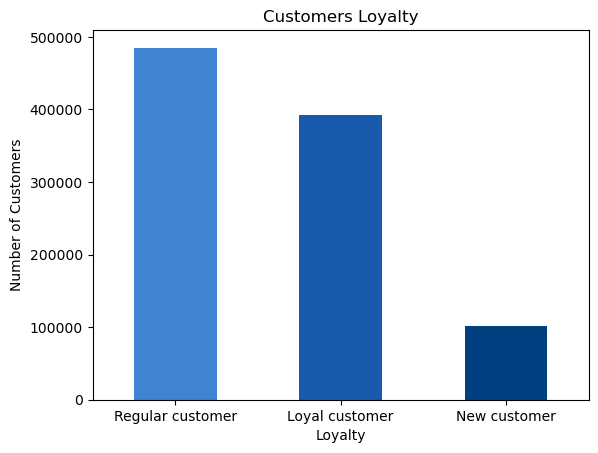

In [73]:
# Create a bar chart for showing the loyaltiy and number of orders
bar_orders_loyalty = marketing['loyalty_flag'].value_counts().plot.bar(title='Customers Loyalty', xlabel='Loyalty', ylabel='Number of Customers', color=blue_palette)
plt.xticks(rotation=0)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 9.png'))
plt.show()

### Days Since Last Order

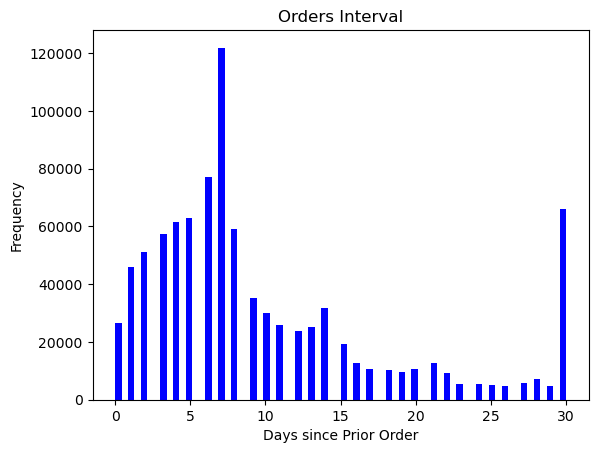

In [74]:
#order Interval  histogram
hist_order_interval = marketing['days_since_prior_order'].plot.hist(bins = 70, title = 'Orders Interval', xlabel = 'Days since Prior Order', color = 'blue')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 10.png'))

### Step 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [75]:
marketing.dtypes 

user_id                      int64
order_number                 int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
department_id               object
prices                     float64
price_range_loc             object
order_day_rank              object
department_id               object
max_order                    int64
loyalty_flag                object
mean_product_price         float64
order_number                 int64
spending_flag               object
order_frequency             object
order_day                    int64
department                  object
Gender                      object
State                       object
Age                          int64
dependants                   int64
family_status               object
income                       int64
region                      object
income_category     

In [76]:
marketing.head()

user_id  order_number  order_hour_of_day  days_since_prior_order  \
0        1             1                  8                     NaN   
1        1             2                  7                   15.00   
2        1             3                 12                   21.00   
3        1             4                  7                   29.00   
4        1             5                 15                   28.00   

   product_id  add_to_cart_order  reordered product_name department_id  \
0         196                  1          0         Soda             7   
1         196                  1          1         Soda             7   
2         196                  1          1         Soda             7   
3         196                  1          1         Soda             7   
4         196                  1          1         Soda             7   

   prices  ...                   department  Gender    State  Age dependants  \
0    9.00  ...  {'department': 'beverages'}  Female  Alabama   31          3   
1    9.00  ...  {'department': 'beverages'}  Female  Alabama   31          3   
2    9.00  ...  {'department': 'beverages'}  Female  Alabama   31          3   
3    9.00  ...  {'department': 'beverages'}  Female  Alabama   31          3   
4    9.00  ...  {'department': 'beverages'}  Female  Alabama   31          3   

   family_status  income region income_category  age_group  
0        married   40423  South      Low Income      adult  
1        married   40423  South      Low Income      adult  
2        married   40423  South      Low Income      adult  
3        married   40423  South      Low Income      adult  
4        married   40423  South      Low Income      adult  

[5 rows x 30 columns]

In [77]:
# Create a depend_flag to indicate whether the customers have dependants or not
marketing['avg_dependant'] = marketing.groupby(['user_id'])['dependants'].transform('mean')
marketing.loc[marketing['avg_dependant'] > 0, 'depend_flag'] = 'With Dependants'
marketing.loc[marketing['avg_dependant'] <= 0, 'depend_flag'] = 'Without Dependants'
marketing['depend_flag'].value_counts(dropna=False)

C:\Users\graha\AppData\Local\Temp\ipykernel_3020\3593467447.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing['avg_dependant'] = marketing.groupby(['user_id'])['dependants'].transform('mean')
C:\Users\graha\AppData\Local\Temp\ipykernel_3020\3593467447.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing.loc[marketing['avg_dependant'] > 0, 'depend_flag'] = 'With Dependants'


depend_flag
With Dependants       737073
Without Dependants    242951
Name: count, dtype: int64

In [78]:
# Convert 'depend_flag' and 'income_category' to string
marketing['income_category'] = marketing['income_category'].astype(str)

C:\Users\graha\AppData\Local\Temp\ipykernel_3020\880860364.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing['income_category'] = marketing['income_category'].astype(str)


In [79]:
# Creating the customer_profile column
marketing['customer_profile'] = marketing['age_group'] + '_' + marketing['income_category'] + '_' + marketing['depend_flag']

C:\Users\graha\AppData\Local\Temp\ipykernel_3020\712030014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  marketing['customer_profile'] = marketing['age_group'] + '_' + marketing['income_category'] + '_' + marketing['depend_flag']


In [80]:
marketing.head()

user_id  order_number  order_hour_of_day  days_since_prior_order  \
0        1             1                  8                     NaN   
1        1             2                  7                   15.00   
2        1             3                 12                   21.00   
3        1             4                  7                   29.00   
4        1             5                 15                   28.00   

   product_id  add_to_cart_order  reordered product_name department_id  \
0         196                  1          0         Soda             7   
1         196                  1          1         Soda             7   
2         196                  1          1         Soda             7   
3         196                  1          1         Soda             7   
4         196                  1          1         Soda             7   

   prices  ... Age dependants family_status  income region  income_category  \
0    9.00  ...  31          3       married   40423  South       Low Income   
1    9.00  ...  31          3       married   40423  South       Low Income   
2    9.00  ...  31          3       married   40423  South       Low Income   
3    9.00  ...  31          3       married   40423  South       Low Income   
4    9.00  ...  31          3       married   40423  South       Low Income   

   age_group avg_dependant      depend_flag                  customer_profile  
0      adult          3.00  With Dependants  adult_Low Income_With Dependants  
1      adult          3.00  With Dependants  adult_Low Income_With Dependants  
2      adult          3.00  With Dependants  adult_Low Income_With Dependants  
3      adult          3.00  With Dependants  adult_Low Income_With Dependants  
4      adult          3.00  With Dependants  adult_Low Income_With Dependants  

[5 rows x 33 columns]

In [81]:
row_names = marketing['customer_profile'].index.tolist()

In [82]:
#customer profile and sales 
customer_profile_sale = marketing.groupby('customer_profile')['prices'].sum()

In [83]:
customer_profile_sale_sorted = customer_profile_sale.sort_values(ascending=False)

In [84]:
colors = plt.cm.Blues(np.linspace(0.3, 0.8, len(customer_profile_sale_sorted)))

In [85]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

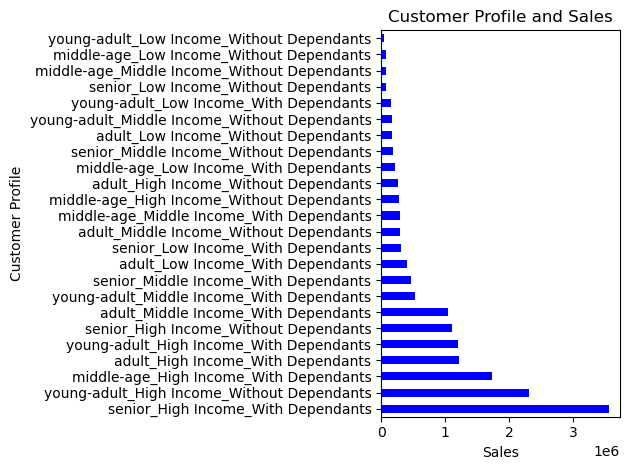

In [86]:
bar_customer_profile = customer_profile_sale_sorted.plot.barh(title = 'Customer Profile and Sales', xlabel = 'Sales', ylabel = 'Customer Profile', color = 'blue')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 12.png'))

In [87]:
marketing.dtypes

user_id                     int64
order_number                int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
department_id              object
prices                    float64
price_range_loc            object
order_day_rank             object
department_id              object
max_order                   int64
loyalty_flag               object
mean_product_price        float64
order_number                int64
spending_flag              object
order_frequency            object
order_day                   int64
department                 object
Gender                     object
State                      object
Age                         int64
dependants                  int64
family_status              object
income                      int64
region                     object
income_category            object
age_group     

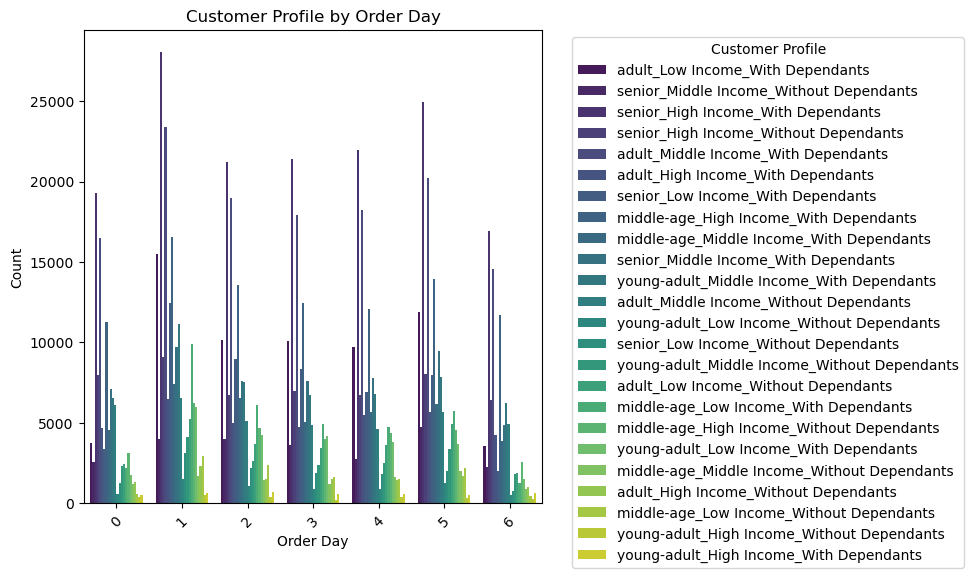

In [88]:
# Define the palette of blue shades
blue_palette = sns.color_palette("Blues", len(marketing['customer_profile'].unique()))

# Bar Plot of 'customer_profile' by 'order_day'
plt.figure(figsize=(10, 6))
sns.countplot(x='order_day', hue='customer_profile', data=marketing, palette='viridis')
plt.title('Customer Profile by Order Day')
plt.xlabel('Order Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis_22.png'), bbox_inches='tight')  # Save with adjusted bounding box
plt.show()

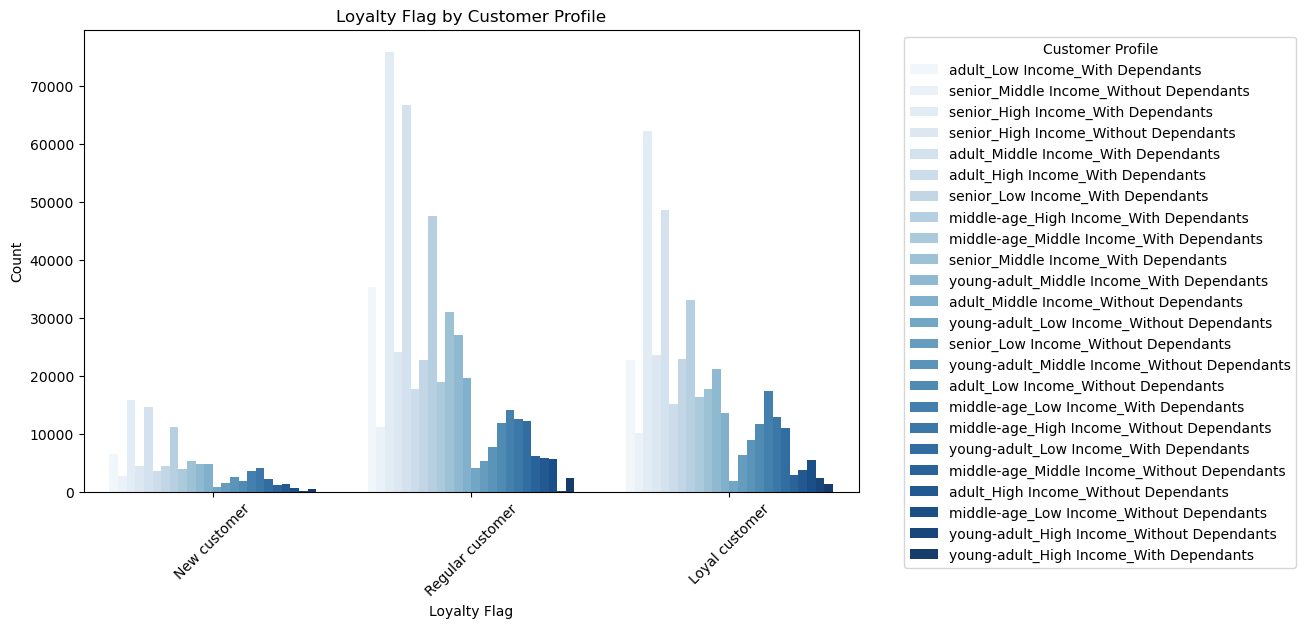

In [89]:
# Define the palette of blue shades
blue_palette = sns.color_palette("Blues", len(marketing['customer_profile'].unique()))

# Bar Plot of 'loyalty_flag' by 'customer_profile'
plt.figure(figsize=(10, 6))
sns.countplot(x='loyalty_flag', hue='customer_profile', data=marketing, palette=blue_palette)
plt.title('Loyalty Flag by Customer Profile')
plt.xlabel('Loyalty Flag')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 14.png'))
plt.show()

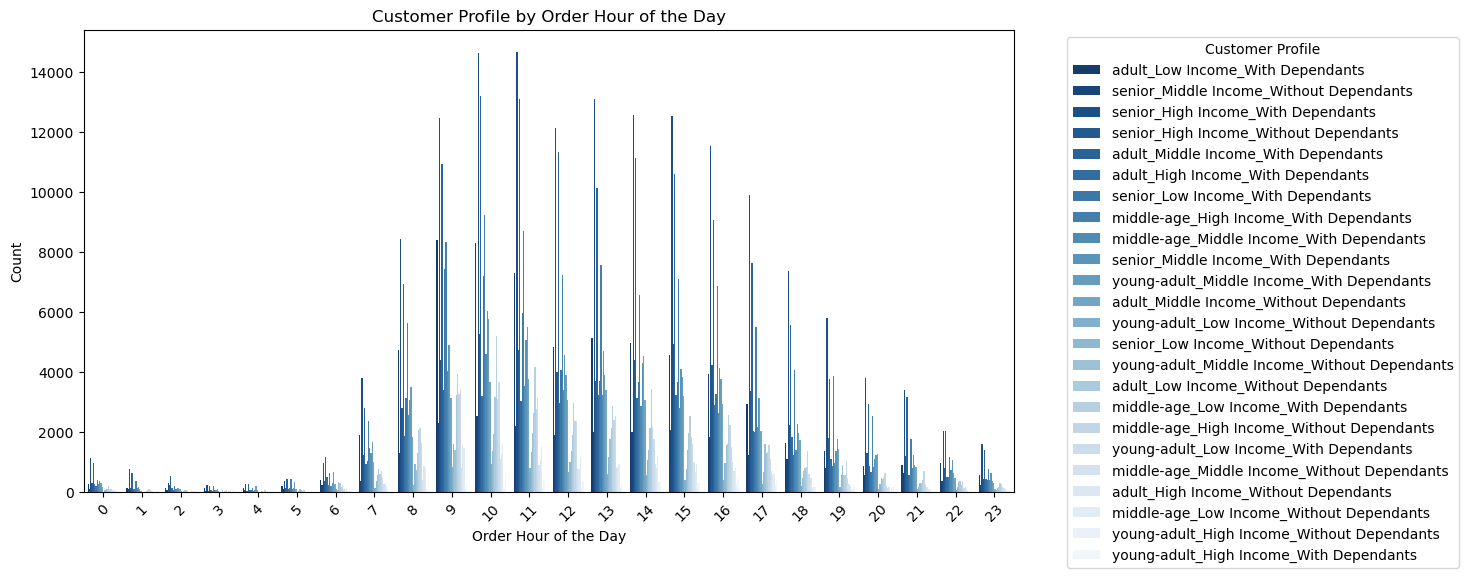

In [90]:
# Create a custom palette of blue shades
custom_blue_palette = sns.color_palette("Blues", len(marketing['customer_profile'].unique()))
custom_blue_palette = custom_blue_palette[::-1]  # Reverse the order for darker shades

# Set the figure size
plt.figure(figsize=(12, 6))  # Increase the width of the figure

# Create the count plot
sns.countplot(x='order_hour_of_day', hue='customer_profile', data=marketing, palette=custom_blue_palette)

# Set the title and axis labels
plt.title('Customer Profile by Order Hour of the Day')
plt.xlabel('Order Hour of the Day')
plt.ylabel('Count')

# Adjust the legend position
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 20.png'), bbox_inches='tight')  # Use bbox_inches='tight' to include the legend
plt.show()

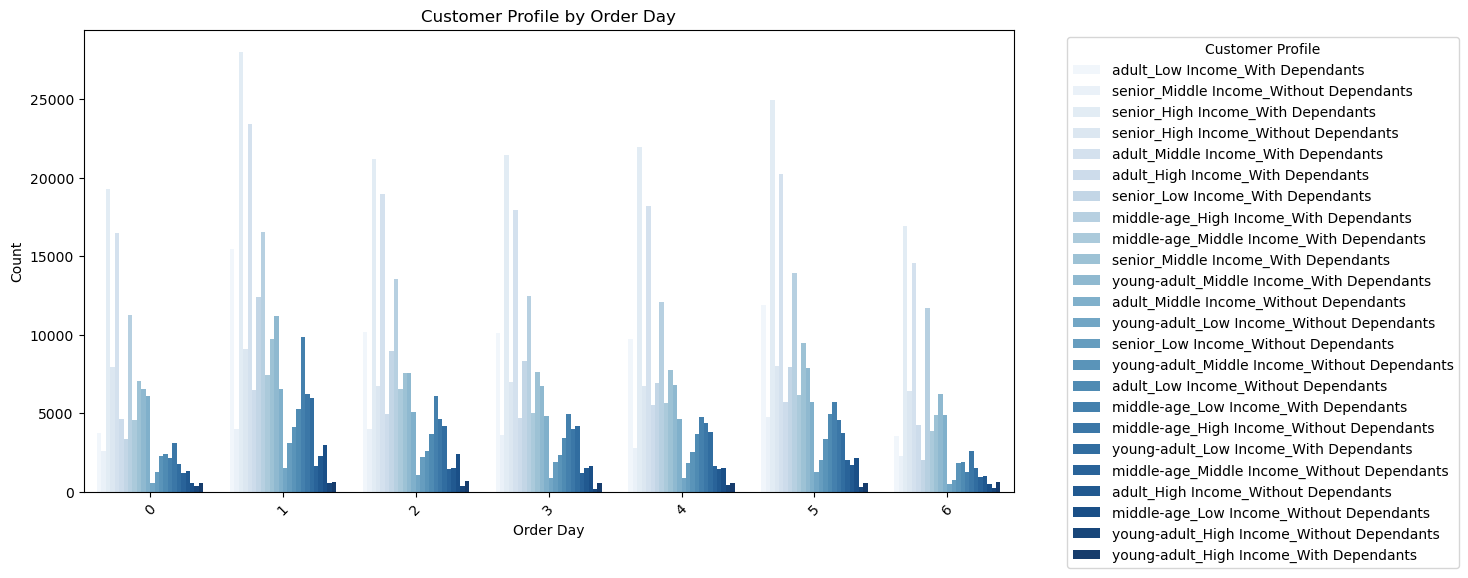

In [91]:
# Define the palette of blue shades
blue_palette = sns.color_palette("Blues", len(marketing['customer_profile'].unique()))

# Set the figure size
plt.figure(figsize=(12, 6))  # Increase the width of the figure

# Create the count plot
ax = sns.countplot(x='order_day', hue='customer_profile', data=marketing, palette=blue_palette)

# Set the title and axis labels
plt.title('Customer Profile by Order Day')
plt.xlabel('Order Day')
plt.ylabel('Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the legend position
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 21.png'), bbox_inches='tight')  # Use bbox_inches='tight' to include the legend
plt.show()

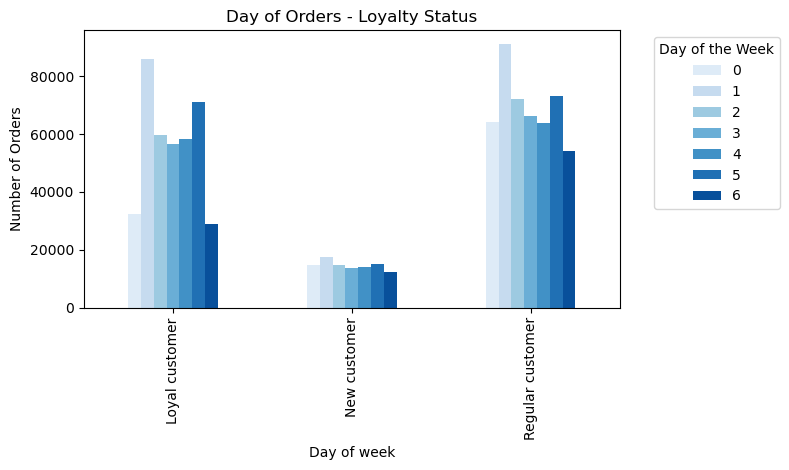

In [92]:
# Define the blue palette
blue_palette = sns.color_palette("Blues", 7)

# Group by 'loyalty_flag' and 'orders_day_of_week', then plot the bar plot
bar_day_loyalty = marketing.groupby('loyalty_flag')['order_day'].value_counts().unstack().plot.bar(title='Day of Orders - Loyalty Status', xlabel='Day of week', ylabel='Number of Orders', color=blue_palette)
plt.tight_layout()
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 15.png'))
plt.show()

### Step 8 Customer Profile, Regions and departments

In [93]:
# Define the blue palette
blue_palette = ['#3f83d1', '#1a5aad', '#004080']

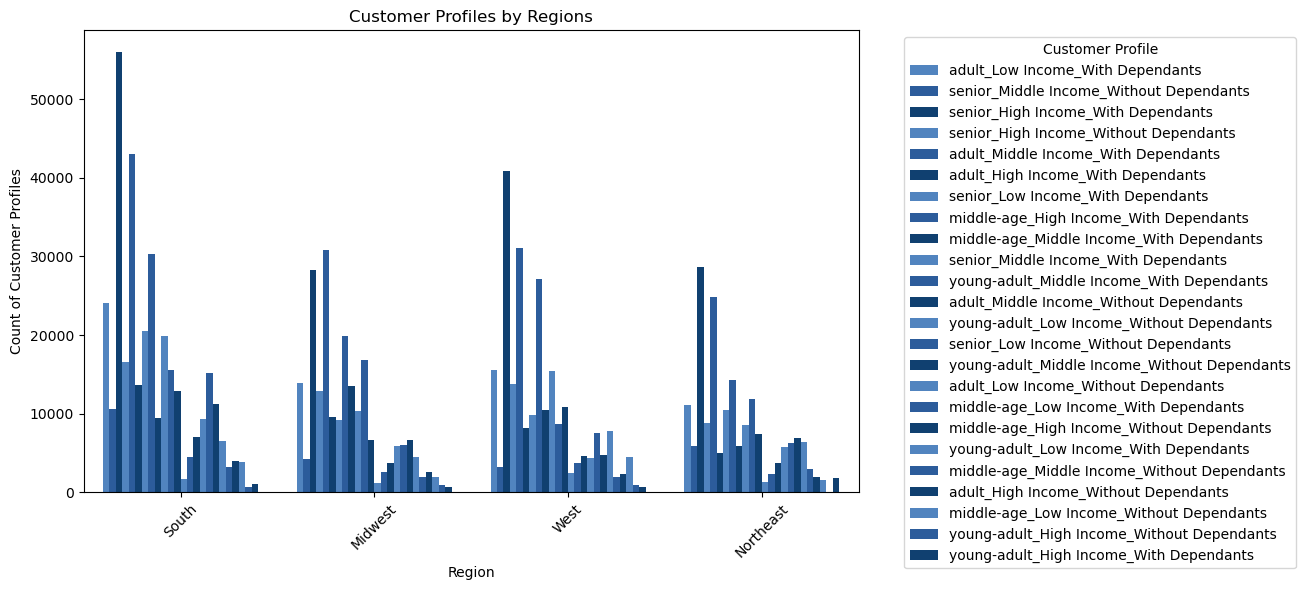

In [94]:
#Bar Plot of Customer Profiles by Regions
plt.figure(figsize=(10, 6))
sns.countplot(x='region', hue='customer_profile', data=marketing, palette=blue_palette)
plt.title('Customer Profiles by Regions')
plt.xlabel('Region')
plt.ylabel('Count of Customer Profiles')
plt.xticks(rotation=45)
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 16.png'))
plt.show()

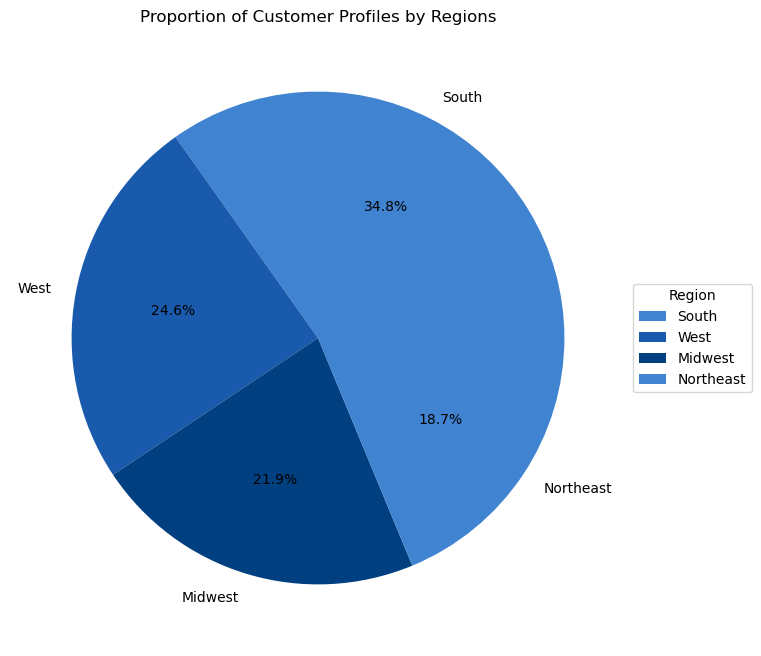

In [95]:
#Pie Chart of Customer Profiles by Regions
plt.figure(figsize=(8, 8))
marketing['region'].value_counts().plot.pie(autopct='%1.1f%%', colors=blue_palette)
plt.title('Proportion of Customer Profiles by Regions')
plt.ylabel('')
plt.legend(title='Region', bbox_to_anchor=(1, 0.5), loc='center left')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 17.png'))
plt.show()

<Figure size 1000x600 with 0 Axes>

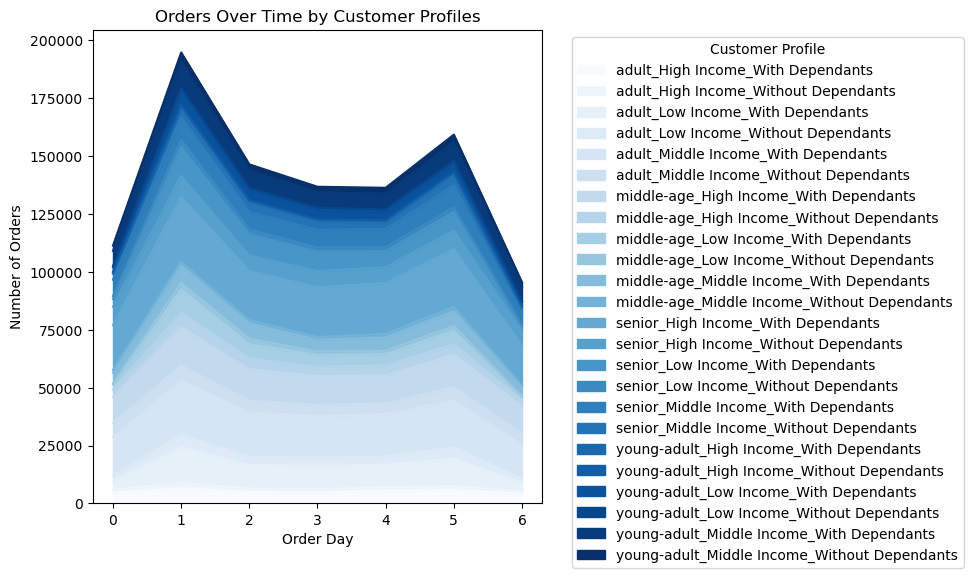

In [96]:
#Stacked Area Chart of Orders Over Time by Customer Profiles
plt.figure(figsize=(10, 6))
marketing.groupby(['order_day', 'customer_profile']).size().unstack().plot(kind='area', stacked=True, colormap='Blues', figsize=(10, 6))
plt.title('Orders Over Time by Customer Profiles')
plt.xlabel('Order Day')
plt.ylabel('Number of Orders')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 18.png'))
plt.show()

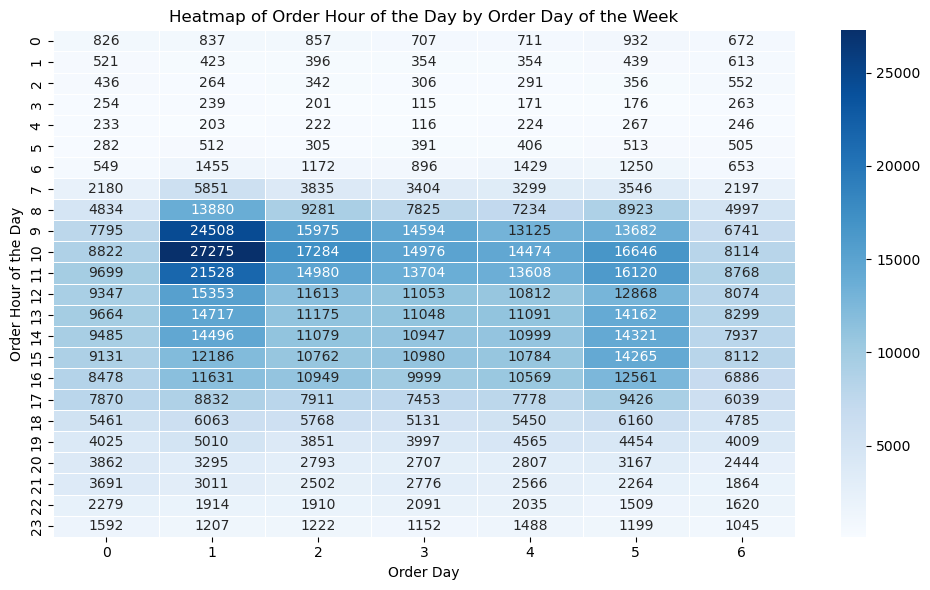

In [97]:
# Choose the variables for the heatmap
heatmap_data = marketing[['order_day', 'order_hour_of_day']]

# Pivot the data to prepare for the heatmap
heatmap_data = heatmap_data.pivot_table(index='order_hour_of_day', columns='order_day', aggfunc=len, fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='g', linewidths=0.5)
plt.title('Heatmap of Order Hour of the Day by Order Day of the Week')
plt.xlabel('Order Day')
plt.ylabel('Order Hour of the Day')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 19.png'))
plt.show()

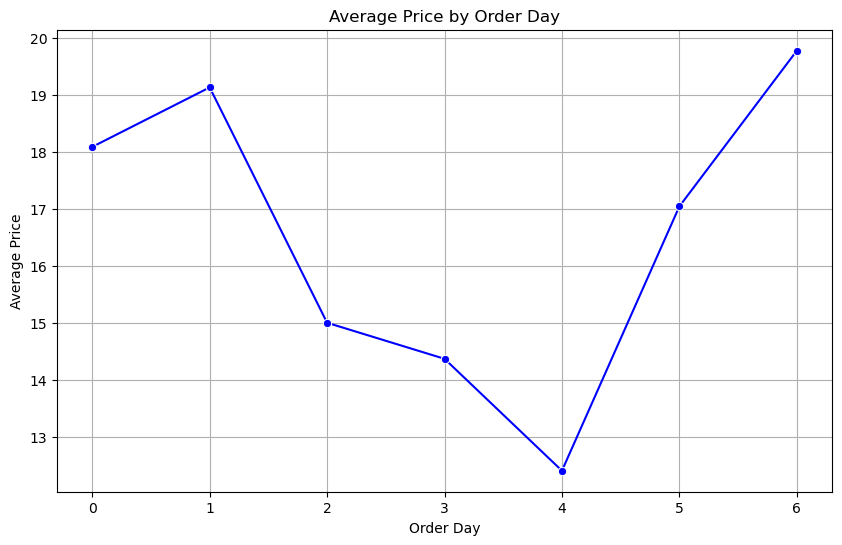

In [98]:
# Aggregate the data to get the average price for each order_day
average_price_per_day = marketing.groupby('order_day')['prices'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_price_per_day, x='order_day', y='prices', marker='o', color='blue')
plt.title('Average Price by Order Day')
plt.xlabel('Order Day')
plt.ylabel('Average Price')
plt.grid(True) 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 1b1.png'))
plt.show()

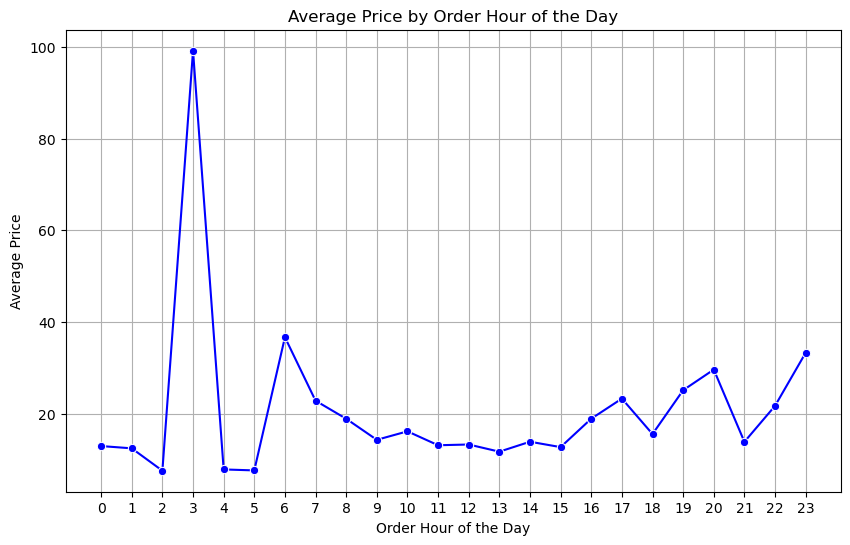

In [99]:
# Aggregate the data to get the average price for each hour of the day
average_price_per_hour = marketing.groupby('order_hour_of_day')['prices'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=average_price_per_hour, x='order_hour_of_day', y='prices', marker='o', color='blue')
plt.title('Average Price by Order Hour of the Day')
plt.xlabel('Order Hour of the Day')
plt.ylabel('Average Price')
plt.xticks(range(0, 24))  # Ensure x-axis ticks show all hours of the day
plt.grid(True)  # Add grid lines for better readability
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 24.png'))
plt.show()

In [100]:
# Define the palette of blue shades
blue_palette = sns.color_palette("Blues", len(marketing['customer_profile'].unique()))

C:\Users\graha\AppData\Local\Temp\ipykernel_3020\2995110195.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=marketing, x='region', y='mean_product_price', hue='dependants', ci=None)


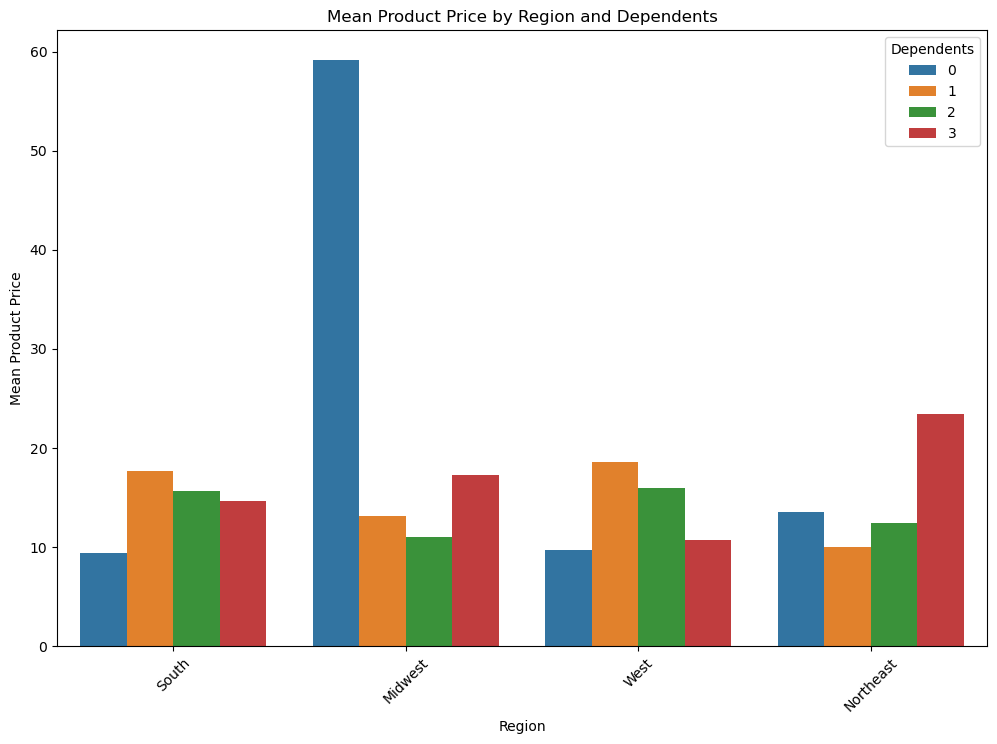

In [101]:
plt.figure(figsize=(12, 8))
sns.barplot(data=marketing, x='region', y='mean_product_price', hue='dependants', ci=None)
plt.title('Mean Product Price by Region and Dependents')
plt.xlabel('Region')
plt.ylabel('Mean Product Price')
plt.xticks(rotation=45)
plt.legend(title='Dependents')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 1b12.png'))
plt.show()

C:\Users\graha\AppData\Local\Temp\ipykernel_3020\1818526782.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=marketing, x='age_group', y='income', hue='income_category', ci=None)


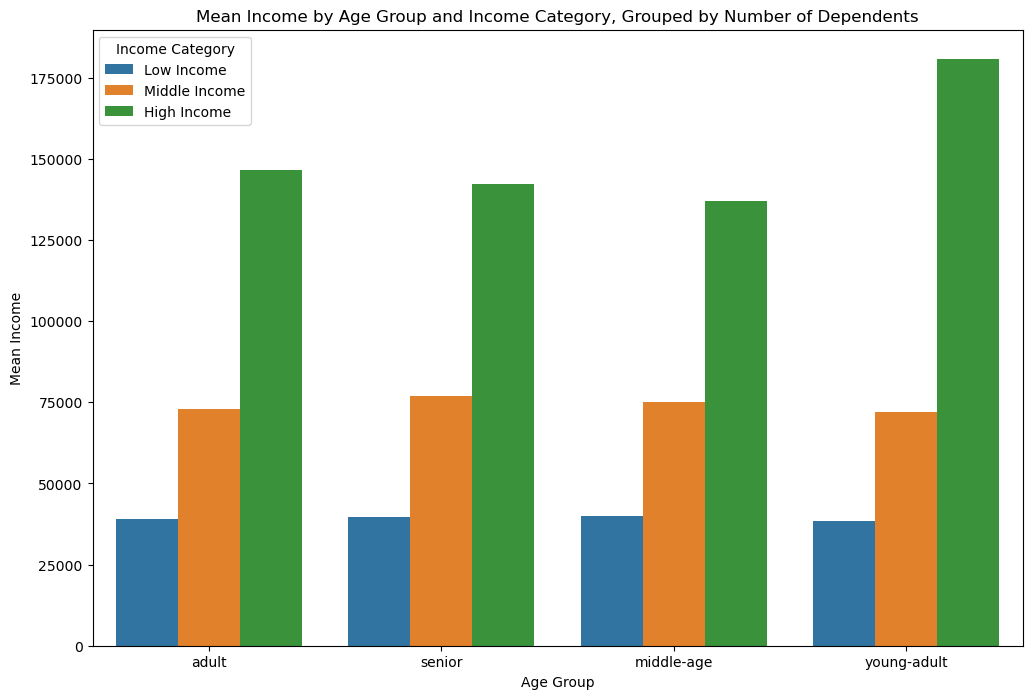

In [102]:
plt.figure(figsize=(12, 8))
sns.barplot(data=marketing, x='age_group', y='income', hue='income_category', ci=None)
plt.title('Mean Income by Age Group and Income Category, Grouped by Number of Dependents')
plt.xlabel('Age Group')
plt.ylabel('Mean Income')
plt.legend(title='Income Category')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 25.png'))
plt.show()

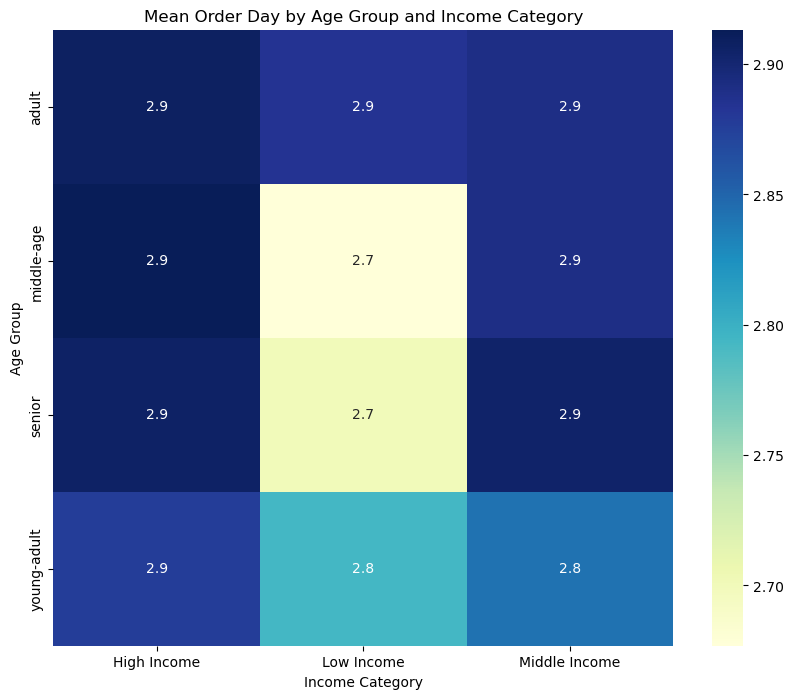

In [103]:
# Pivot the data to create a matrix where rows represent age groups, columns represent income groups, and values represent the mean order day
pivot_table = marketing.pivot_table(index='age_group', columns='income_category', values='order_day', aggfunc=np.mean)

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", cbar=True)
plt.title('Mean Order Day by Age Group and Income Category')
plt.xlabel('Income Category')
plt.ylabel('Age Group')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 26.png'))
plt.show()

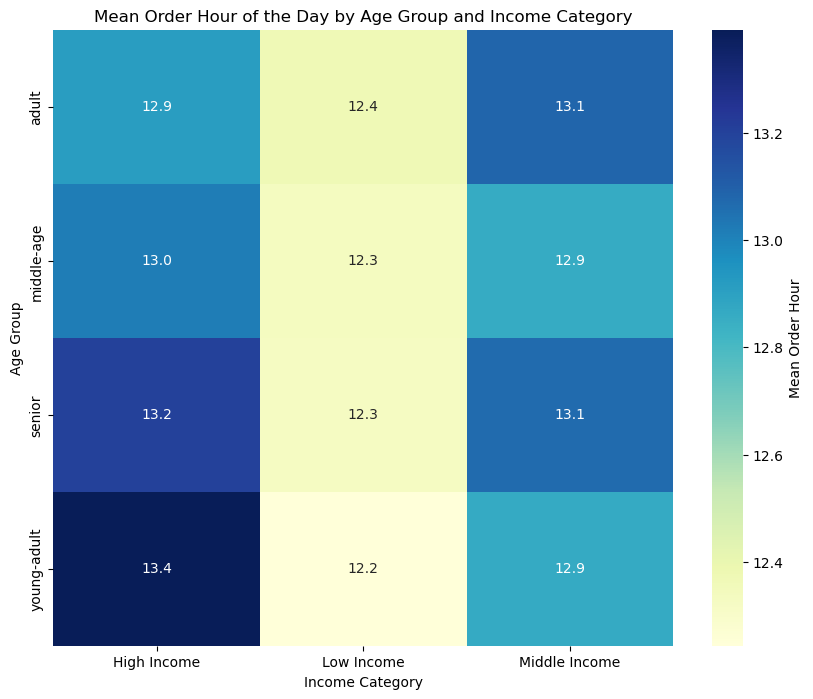

In [104]:
# Pivot the data to create a matrix where rows represent age groups, columns represent income groups, and values represent the mean order hour of the day
pivot_table = marketing.pivot_table(index='age_group', columns='income_category', values='order_hour_of_day', aggfunc=np.mean)

plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt=".1f", cbar=True)
plt.title('Mean Order Hour of the Day by Age Group and Income Category')
plt.xlabel('Income Category')
plt.ylabel('Age Group')

# Add color bar with labels
cbar = heatmap.collections[0].colorbar
cbar.set_label('Mean Order Hour')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 27.png'))

plt.show()

C:\Users\graha\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


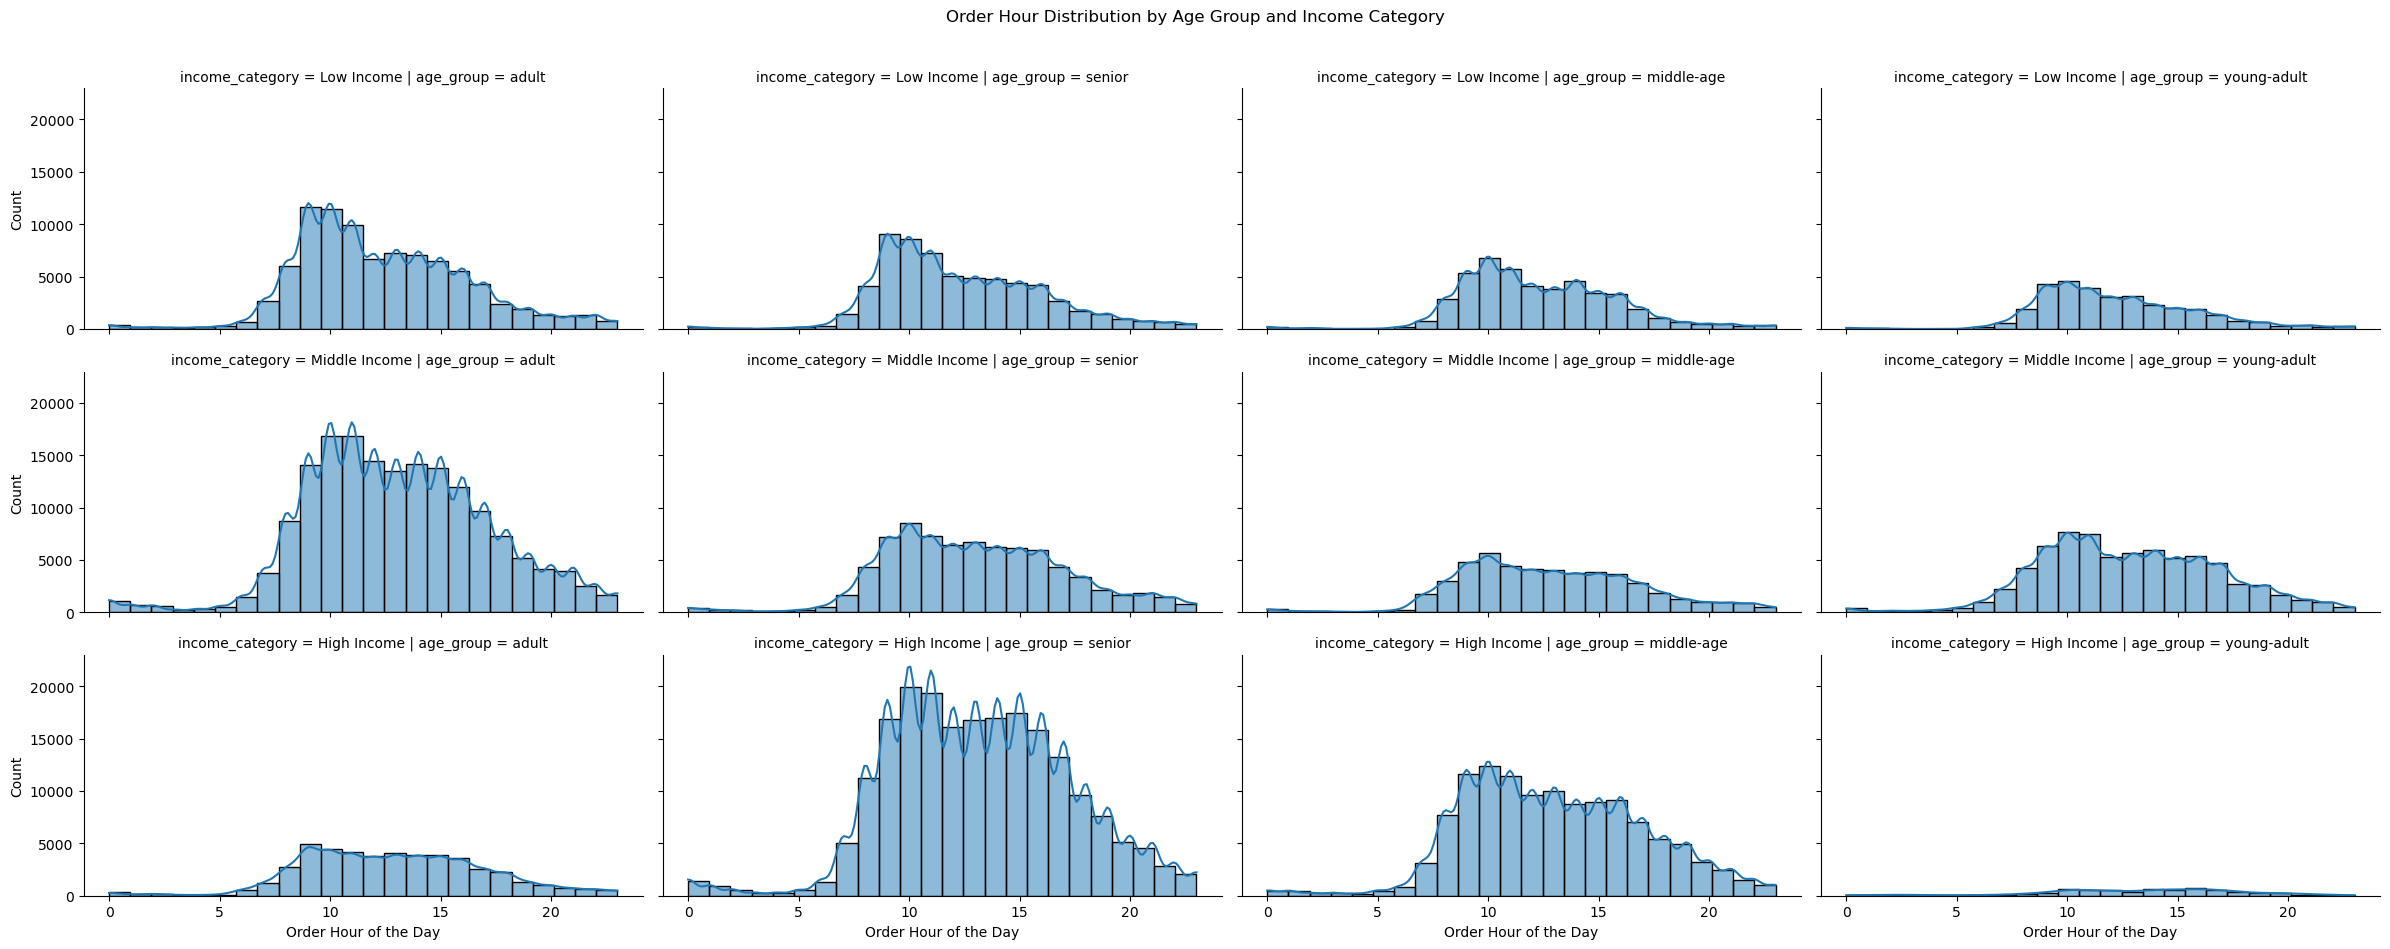

In [105]:
#age, income, order hour of the day

g = sns.FacetGrid(marketing, col='age_group', row='income_category', height=3, aspect=2)
g.map(sns.histplot, 'order_hour_of_day', bins=24, kde=True)
g.set_axis_labels('Order Hour of the Day', 'Count')
plt.suptitle('Order Hour Distribution by Age Group and Income Category', y=1.05)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 28.png'))
plt.show()

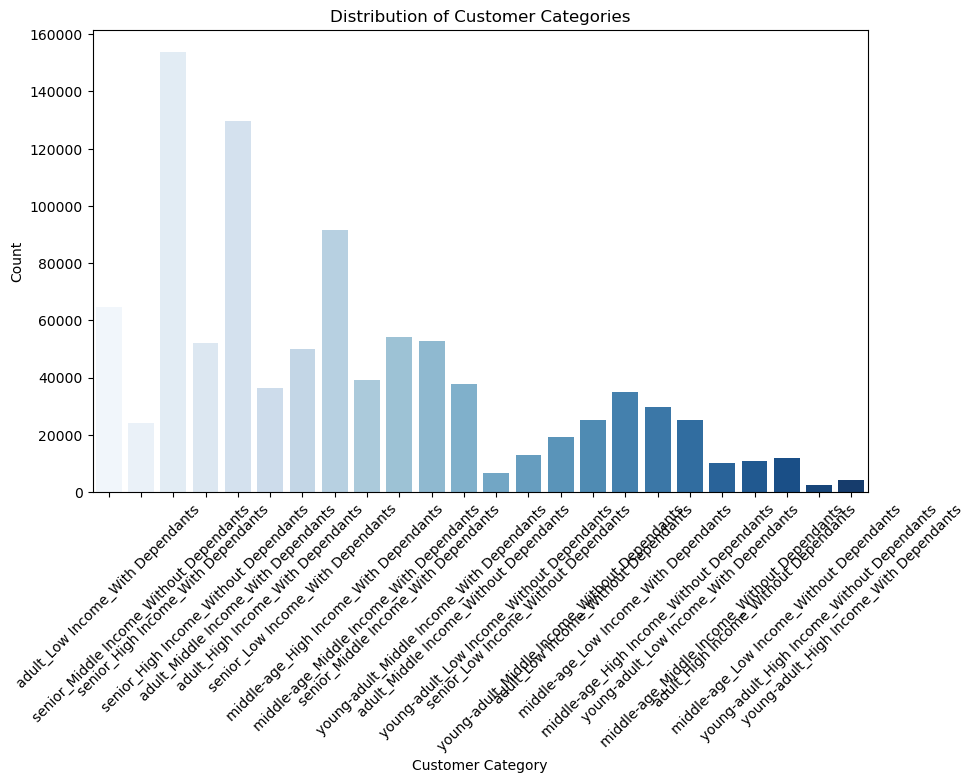

In [106]:
plt.figure(figsize=(10, 6))
sns.countplot(data=marketing, x='customer_profile', palette='Blues')
plt.title('Distribution of Customer Categories')
plt.xlabel('Customer Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis 29.png'))
plt.show()

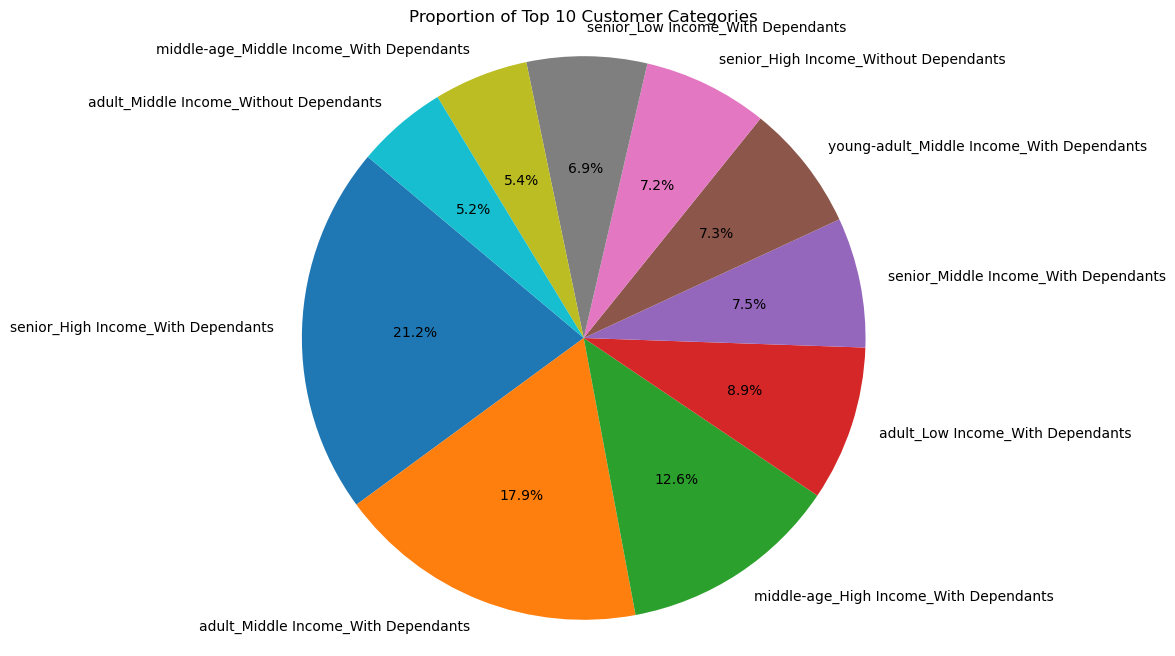

In [107]:
# Get the top 10 customer categories
top_10_customer_counts = marketing['customer_profile'].value_counts().nlargest(10)

# Plot the pie chart for the top 10 customer categories
plt.figure(figsize=(8, 8))
plt.pie(top_10_customer_counts, labels=top_10_customer_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Top 10 Customer Categories')
plt.axis('equal')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis_30.png'))
plt.show()

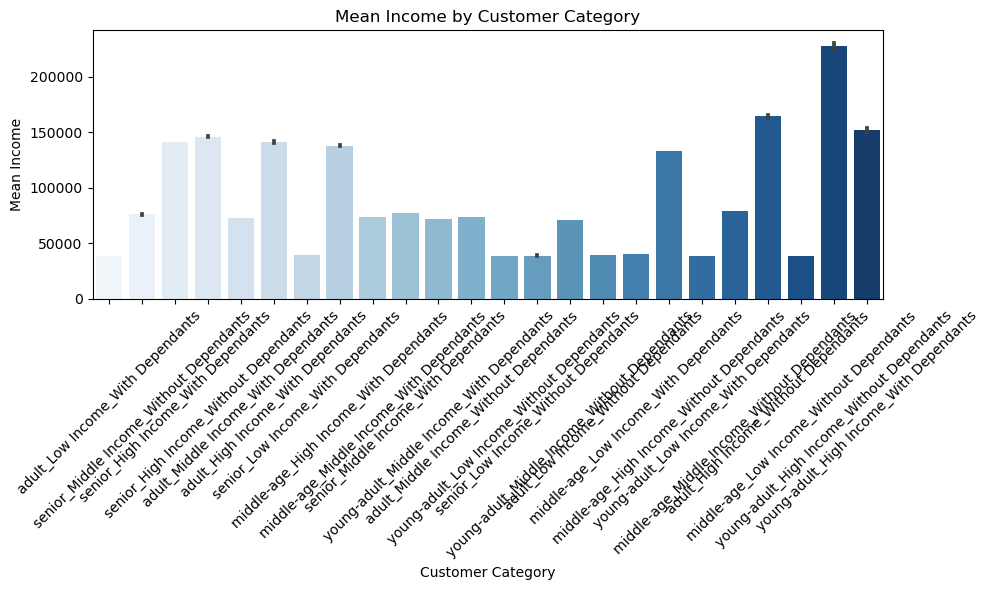

In [108]:
plt.figure(figsize=(10, 6))
sns.barplot(data=marketing, x='customer_profile', y='income', estimator=np.mean, palette='Blues')
plt.title('Mean Income by Customer Category')
plt.xlabel('Customer Category')
plt.ylabel('Mean Income')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent titles from being cut off
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis_31.png'))
plt.show()

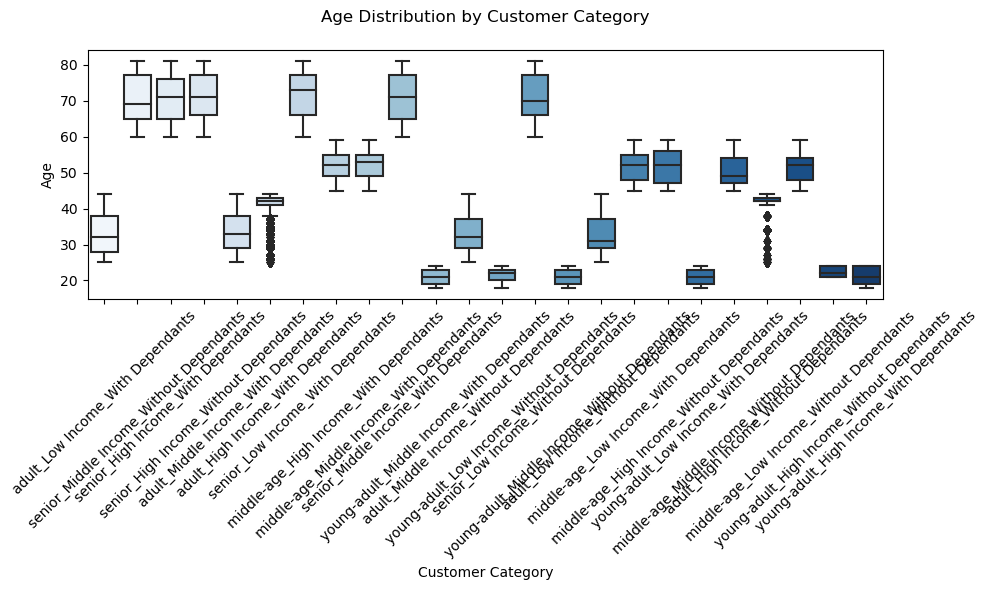

In [109]:

# Set the figure size
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(data=marketing, x='customer_profile', y='Age', palette='Blues')

# Set the title and axis labels
plt.title('Age Distribution by Customer Category', pad=20)  # Adjust the padding as needed
plt.xlabel('Customer Category')
plt.ylabel('Age')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Save the plot
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis_32.png'))

# Show the plot
plt.show()

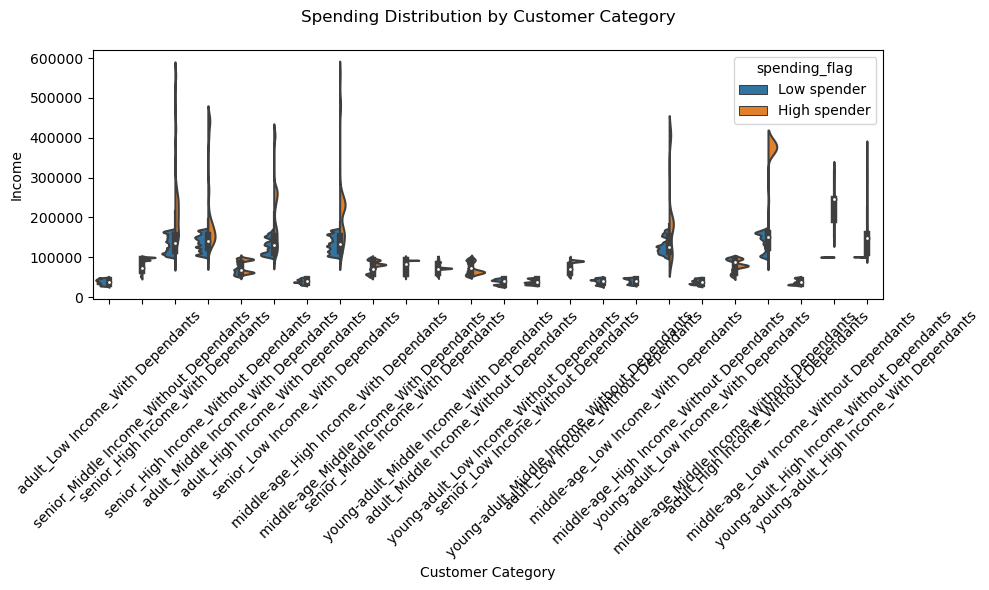

In [110]:
plt.figure(figsize=(10, 6))
sns.violinplot(data=marketing, x='customer_profile', y='income', hue='spending_flag', split=True)
plt.title('Spending Distribution by Customer Category', pad=20)
plt.xlabel('Customer Category')
plt.ylabel('Income')
plt.xticks(rotation=45)
plt.tight_layout()  
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis_33.png'))
plt.show()

In [111]:
# Group by customer_id and calculate max, mean, and min
profile_agg = marketing.groupby('user_id').agg({
    'Age': ['max', 'mean', 'min'],
    'dependants': ['max', 'mean', 'min']
}).reset_index()

In [112]:
# Rename columns for clarity
profile_agg.columns = ['user_id', 
                              'max_age', 'mean_age', 'min_age',
                              'max_dependants', 'mean_dependants', 'min_dependants']

In [113]:
# Display the aggregated DataFrame
print(profile_agg)

      user_id  max_age  mean_age  min_age  max_dependants  mean_dependants  \
0           1       31     31.00       31               3             3.00   
1          15       69     69.00       69               0             0.00   
2          19       62     62.00       62               1             1.00   
3          21       71     71.00       71               0             0.00   
4          31       38     38.00       38               1             1.00   
...       ...      ...       ...      ...             ...              ...   
6023   176562       66     66.00       66               2             2.00   
6024   176604       25     25.00       25               2             2.00   
6025   176618       75     75.00       75               0             0.00   
6026   176623       45     45.00       45               1             1.00   
6027   176637       36     36.00       36               1             1.00   

      min_dependants  
0                  3  
1                

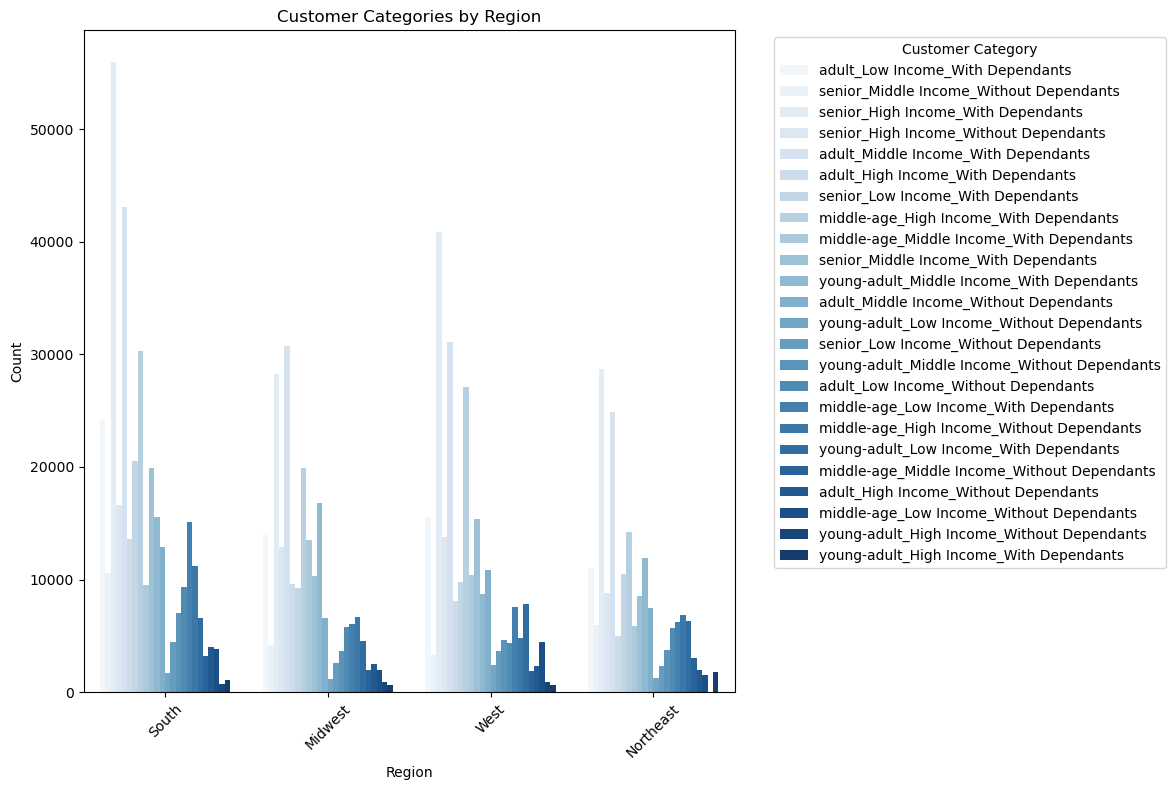

In [114]:
plt.figure(figsize=(12, 8))
sns.countplot(data=marketing, x='region', hue='customer_profile', palette='Blues')
plt.title('Customer Categories by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Customer Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis_35.png'), bbox_inches='tight')
plt.show()

In [115]:
marketing.head()

user_id  order_number  order_hour_of_day  days_since_prior_order  \
0        1             1                  8                     NaN   
1        1             2                  7                   15.00   
2        1             3                 12                   21.00   
3        1             4                  7                   29.00   
4        1             5                 15                   28.00   

   product_id  add_to_cart_order  reordered product_name department_id  \
0         196                  1          0         Soda             7   
1         196                  1          1         Soda             7   
2         196                  1          1         Soda             7   
3         196                  1          1         Soda             7   
4         196                  1          1         Soda             7   

   prices  ... Age dependants family_status  income region  income_category  \
0    9.00  ...  31          3       married   40423  South       Low Income   
1    9.00  ...  31          3       married   40423  South       Low Income   
2    9.00  ...  31          3       married   40423  South       Low Income   
3    9.00  ...  31          3       married   40423  South       Low Income   
4    9.00  ...  31          3       married   40423  South       Low Income   

   age_group avg_dependant      depend_flag                  customer_profile  
0      adult          3.00  With Dependants  adult_Low Income_With Dependants  
1      adult          3.00  With Dependants  adult_Low Income_With Dependants  
2      adult          3.00  With Dependants  adult_Low Income_With Dependants  
3      adult          3.00  With Dependants  adult_Low Income_With Dependants  
4      adult          3.00  With Dependants  adult_Low Income_With Dependants  

[5 rows x 33 columns]

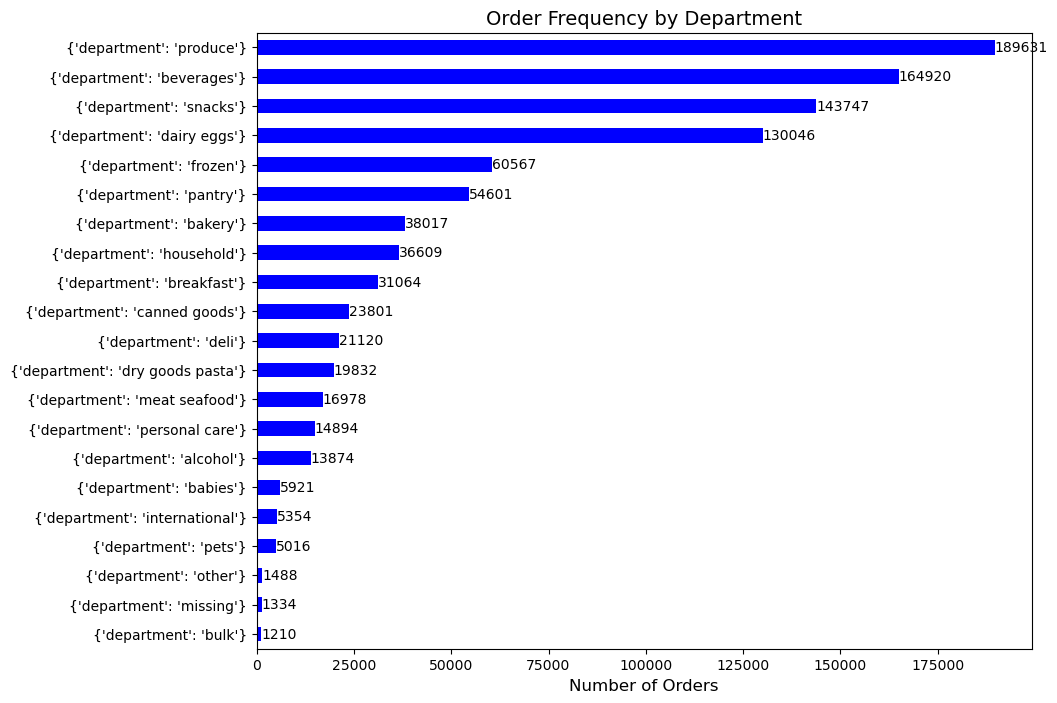

In [123]:
# Set plot size
plt.figure(figsize=(10, 8))  # Increase the figure size

# Plot the horizontal bar chart
barh_departments = marketing['department'].value_counts(ascending=True).plot(kind='barh', color='blue')

# Set title and labels
plt.title('Order Frequency by Department', fontsize=14)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('') 

# Add values to the bars
for index, value in enumerate(marketing['department'].value_counts(ascending=True)):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10)

# Save the plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis_36.png'), bbox_inches='tight')  # Save the plot with tight bounding box
plt.show()

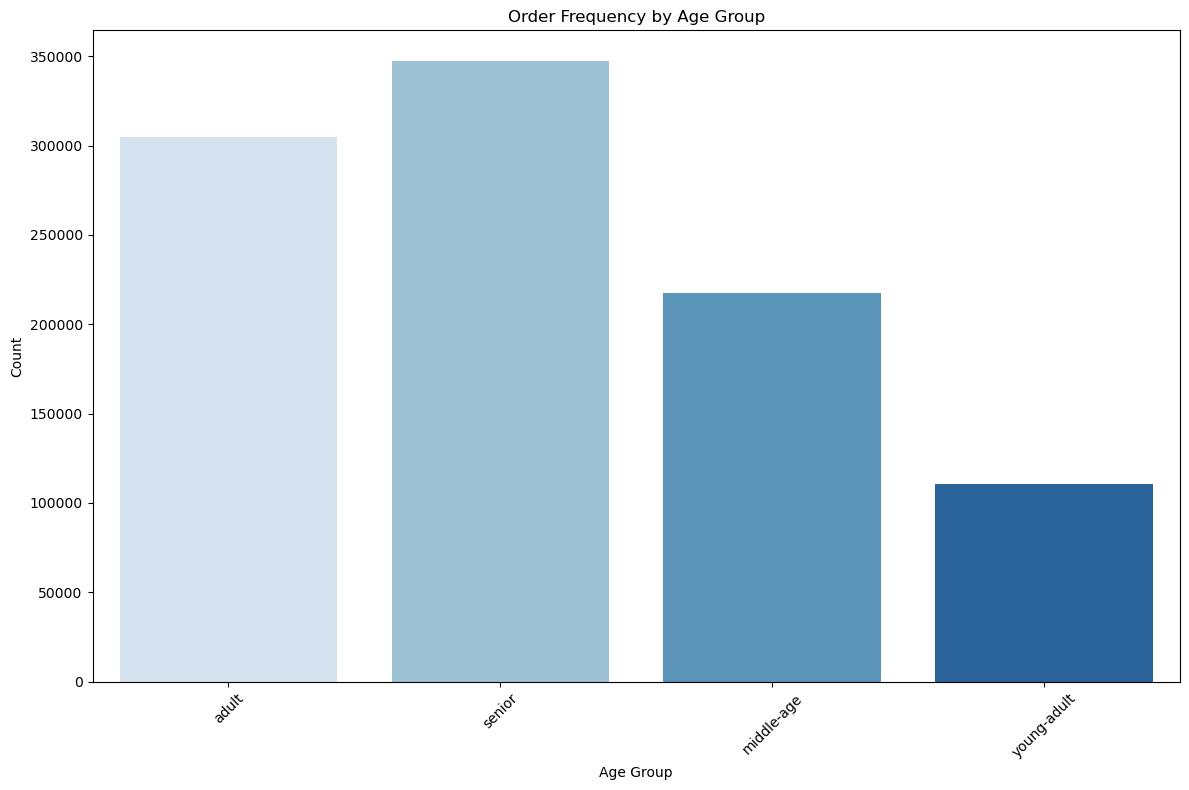

In [124]:
plt.figure(figsize=(12, 8))
sns.countplot(data=marketing, x='age_group', palette='Blues')
plt.title('Order Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout() 
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'vis_37.png'))
plt.show()